In [224]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

In [7]:
!pip install librosa

     ------------------------------------- 253.0/253.0 kB 16.2 MB/s eta 0:00:00
     ------------------------------------- 184.0/184.0 kB 11.6 MB/s eta 0:00:00
     ------------------------------------- 377.0/377.0 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.0/1.0 MB 21.3 MB/s eta 0:00:00
  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23736 sha256=136512f93da68bf35fe8cf4fa971570554c7265a3c75faee1168e8b40fafc74a
  Stored in directory: c:\users\이도형\appdata\local\pip\cache\wheels\3d\e0\4b\51b8aa4a0e2b6361c14943f7a7c2c7adb7b9cd419e0a1b720d
Successfully built audioread


In [225]:
import librosa
import numpy as np
from tqdm.auto import tqdm

In [3]:
train.head()

id                    path  label
0  TRAIN_0000  ./train/TRAIN_0000.wav      1
1  TRAIN_0001  ./train/TRAIN_0001.wav      2
2  TRAIN_0002  ./train/TRAIN_0002.wav      4
3  TRAIN_0003  ./train/TRAIN_0003.wav      5
4  TRAIN_0004  ./train/TRAIN_0004.wav      4

In [4]:
audio_dir = 'train/'

mfcc_features = []
mel_spec_features = []
D_features = []
normal_mfcc_features = []
normal_mel_features = []
for i in tqdm(range(len(train))):
  y, sr = librosa.load(audio_dir+f'TRAIN_{str(i).zfill(4)}.wav',sr=44100)
  D = np.abs(librosa.stft(y))
  mel_spec = librosa.feature.melspectrogram(y=y, sr=44100)
  mfcc = librosa.feature.mfcc(y=y, sr=44100)
  normalized_mfcc = librosa.util.normalize(mfcc)
  normalized_mel_spec = librosa.util.normalize(mel_spec)
  

  a_feature = []
  b_feature = []
  c_feature = []
  d_feature = []
  e_feature = []
        # 추출된 MFCC들의 평균을 Feature로 사용
  for e in mfcc:
     a_feature.append(np.mean(e))
  mfcc_features.append(a_feature)

        # 추출된 Mel_spec들의 평균을 Feature로 사용
  for e in mel_spec:
     b_feature.append(np.mean(e))
  mel_spec_features.append(b_feature)

        # 추출된 D들의 평균을 Feature로 사용
  for e in D:
     c_feature.append(np.mean(e))
  D_features.append(c_feature)

          # 추출된 normalized_mfcc들의 평균을 Feature로 사용
  for e in normalized_mfcc:
     d_feature.append(np.mean(e))
  normal_mfcc_features.append(d_feature)

          # 추출된 normalized_mel_spec들의 평균을 Feature로 사용
  for e in normalized_mel_spec:
     e_feature.append(np.mean(e))
  normal_mel_features.append(e_feature)


  0%|          | 0/5001 [00:00<?, ?it/s]

In [226]:
print(D.shape,mel_spec.shape,mfcc.shape,normalized_mel_spec.shape,normalized_mfcc.shape)

(1025, 271) (128, 271) (271, 13) (128, 271) (20, 271)


In [6]:
mfcc_df = pd.DataFrame(mfcc_features, columns=['mfcc_'+str(x) for x in range(1,21)])
mel_spec_df = pd.DataFrame(mel_spec_features, columns=['mel_spec_'+str(x) for x in range(1,129)])
D_df = pd.DataFrame(D_features, columns=['D_'+str(x) for x in range(1,1026)])
normal_mfcc_df = pd.DataFrame(normal_mfcc_features, columns=['normal_mfcc_'+str(x) for x in range(1,21)])
normal_mel_df = pd.DataFrame(normal_mel_features, columns=['normal_mel_'+str(x) for x in range(1,129)])

In [227]:
x_train = pd.concat([mfcc_df,mel_spec_df,D_df],axis=1)
print(x_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Columns: 1166 entries, mfcc_1 to D_1025
dtypes: float32(1166)
memory usage: 22.2 MB
None


In [228]:
y_train = train['label']
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5001 entries, 0 to 5000
Series name: label
Non-Null Count  Dtype
--------------  -----
5001 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


In [242]:
mfcc_features = []
mel_spec_features = []
D_features = []
normal_mfcc_features = []
normal_mel_features = []
for i in tqdm(range(len(test))):
  y, sr = librosa.load('test/'+f'TEST_{str(i).zfill(4)}.wav',sr=44100)
  D = np.abs(librosa.stft(y))
  mel_spec = librosa.feature.melspectrogram(y=y, sr=44100)
  mfcc = librosa.feature.mfcc(y=y, sr=44100)
  normalized_mfcc = librosa.util.normalize(mfcc)
  normalized_mel_spec = librosa.util.normalize(mel_spec)
  

  a_feature = []
  b_feature = []
  c_feature = []
  d_feature = []
  e_feature = []
        # 추출된 MFCC들의 평균을 Feature로 사용
  for e in mfcc:
     a_feature.append(np.mean(e))
  mfcc_features.append(a_feature)

        # 추출된 Mel_spec들의 평균을 Feature로 사용
  for e in mel_spec:
     b_feature.append(np.mean(e))
  mel_spec_features.append(b_feature)

        # 추출된 D들의 평균을 Feature로 사용
  for e in D:
     c_feature.append(np.mean(e))
  D_features.append(c_feature)

          # 추출된 normalized_mfcc들의 평균을 Feature로 사용
  for e in normalized_mfcc:
     d_feature.append(np.mean(e))
  normal_mfcc_features.append(d_feature)

          # 추출된 normalized_mel_spec들의 평균을 Feature로 사용
  for e in normalized_mel_spec:
     e_feature.append(np.mean(e))
  normal_mel_features.append(e_feature)

  0%|          | 0/1881 [00:00<?, ?it/s]

In [243]:
print(D.shape,mel_spec.shape,mfcc.shape,normalized_mel_spec.shape,normalized_mfcc.shape)

(1025, 161) (128, 161) (20, 161) (128, 161) (20, 161)


In [244]:
mfcc_df = pd.DataFrame(mfcc_features, columns=['mfcc_'+str(x) for x in range(1,21)])
mel_spec_df = pd.DataFrame(mel_spec_features, columns=['mel_spec_'+str(x) for x in range(1,129)])
D_df = pd.DataFrame(D_features, columns=['D_'+str(x) for x in range(1,1026)])
normal_mfcc_df = pd.DataFrame(normal_mfcc_features, columns=['normal_mfcc_'+str(x) for x in range(1,21)])
normal_mel_df = pd.DataFrame(normal_mel_features, columns=['normal_mel_'+str(x) for x in range(1,129)])

In [245]:
x_test = pd.concat([mfcc_df,mel_spec_df,D_df],axis=1)
print(x_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Columns: 1173 entries, mfcc_1 to D_1025
dtypes: float32(1173)
memory usage: 8.4 MB
None


In [19]:
!pip install torchvision

     ---------------------------------------- 1.2/1.2 MB 12.6 MB/s eta 0:00:00
     ------------------------------------- 172.3/172.3 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


In [229]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [230]:
class EmotionClassifier(nn.Module):
    def __init__(self, num_classes):
        super(EmotionClassifier, self).__init__()
        resnet = models.resnet50(pretrained=True)
        modules = list(resnet.children())[:-1]
        self.resnet = nn.Sequential(*modules)
        self.fc = nn.Linear(resnet.fc.in_features, num_classes)
    
    def forward(self, x):
        features = self.resnet(x)
        features = features.view(features.size(0), -1)
        output = self.fc(features)
        return output

In [231]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [232]:
num_classes = 4
batch_size = 16
learning_rate = 0.001
num_epochs = 10

In [233]:
x_train_np = x_train.to_numpy()

In [234]:
features = torch.tensor(x_train_np, dtype=torch.float32)

In [235]:
if isinstance(features, torch.sparse.FloatTensor):
    features = features.to_dense()

In [236]:
if features.dim() == 3:
    features = features.unsqueeze(1)  # Add a channel dimension
elif features.dim() == 2:
    features = features.unsqueeze(1).unsqueeze(3)

In [237]:
features = features.repeat(1, 3, 1, 1)
label_mapping = {'label1': 0, 'label2': 1, 'label3': 2, 'label4': 3}  # Update with your label mapping

In [238]:
labels = []

# Convert labels to encoded labels using the label_mapping dictionary
for label in y_train:
    try:
        encoded_label = label_mapping[label]
        labels.append(encoded_label)
    except KeyError:
        # Handle the case when label is not found in the label_mapping dictionary
        # You can either skip that sample or assign a default value
        # For example, assigning a default label of 0
        labels.append(0)

# Convert the list of labels to a PyTorch tensor
labels = torch.tensor(labels, dtype=torch.long)

In [239]:
# Create the dataset and data loader
dataset = torch.utils.data.TensorDataset(features, labels)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create the model instance
model = EmotionClassifier(num_classes).to(device)

C:\anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\이도형/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:05<00:00, 17.2MB/s]


In [240]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [241]:
# Training loop
total_steps = len(data_loader)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(data_loader):
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}")


Epoch [1/10], Step [10/313], Loss: 0.0003
Epoch [1/10], Step [20/313], Loss: 0.0000
Epoch [1/10], Step [30/313], Loss: 0.0000
Epoch [1/10], Step [40/313], Loss: 0.0000
Epoch [1/10], Step [50/313], Loss: 0.0000
Epoch [1/10], Step [60/313], Loss: 0.0000
Epoch [1/10], Step [70/313], Loss: 0.0000
Epoch [1/10], Step [80/313], Loss: 0.0000
Epoch [1/10], Step [90/313], Loss: 0.0000
Epoch [1/10], Step [100/313], Loss: 0.0000
Epoch [1/10], Step [110/313], Loss: 0.0000
Epoch [1/10], Step [120/313], Loss: 0.0000
Epoch [1/10], Step [130/313], Loss: 0.0000
Epoch [1/10], Step [140/313], Loss: 0.0000
Epoch [1/10], Step [150/313], Loss: 0.0000
Epoch [1/10], Step [160/313], Loss: 0.0000
Epoch [1/10], Step [170/313], Loss: 0.0000
Epoch [1/10], Step [180/313], Loss: 0.0000
Epoch [1/10], Step [190/313], Loss: 0.0000
Epoch [1/10], Step [200/313], Loss: 0.0000
Epoch [1/10], Step [210/313], Loss: 0.0000
Epoch [1/10], Step [220/313], Loss: 0.0000
Epoch [1/10], Step [230/313], Loss: 0.0000
Epoch [1/10], Step [

Epoch [7/10], Step [70/313], Loss: 0.0000
Epoch [7/10], Step [80/313], Loss: 0.0000
Epoch [7/10], Step [90/313], Loss: 0.0000
Epoch [7/10], Step [100/313], Loss: 0.0000
Epoch [7/10], Step [110/313], Loss: 0.0000
Epoch [7/10], Step [120/313], Loss: 0.0000
Epoch [7/10], Step [130/313], Loss: 0.0000
Epoch [7/10], Step [140/313], Loss: 0.0000
Epoch [7/10], Step [150/313], Loss: 0.0000
Epoch [7/10], Step [160/313], Loss: 0.0000
Epoch [7/10], Step [170/313], Loss: 0.0000
Epoch [7/10], Step [180/313], Loss: 0.0000
Epoch [7/10], Step [190/313], Loss: 0.0000
Epoch [7/10], Step [200/313], Loss: 0.0000
Epoch [7/10], Step [210/313], Loss: 0.0000
Epoch [7/10], Step [220/313], Loss: 0.0000
Epoch [7/10], Step [230/313], Loss: 0.0000
Epoch [7/10], Step [240/313], Loss: 0.0000
Epoch [7/10], Step [250/313], Loss: 0.0000
Epoch [7/10], Step [260/313], Loss: 0.0000
Epoch [7/10], Step [270/313], Loss: 0.0000
Epoch [7/10], Step [280/313], Loss: 0.0000
Epoch [7/10], Step [290/313], Loss: 0.0000
Epoch [7/10], 

In [250]:
x_test_np = x_test.to_numpy()
features_test = torch.tensor(x_test_np, dtype=torch.float32)

In [251]:
if isinstance(features_test, torch.sparse.FloatTensor):
    features_test = features_test.to_dense()

In [252]:
if features_test.dim() == 3:
    features_test = features_test.unsqueeze(1)  # Add a channel dimension
elif features_test.dim() == 2:
    features_test = features_test.unsqueeze(1).unsqueeze(3)

In [253]:
features_test = features_test.repeat(1, 3, 1, 1)

In [254]:
# Evaluation on test data
features_test = features_test.to(device)

model.eval()
with torch.no_grad():
    outputs_test = model(features_test)
    _, predicted_test = torch.max(outputs_test.data, 1)

In [262]:
predicted_test

tensor([0, 0, 0,  ..., 0, 0, 0])

In [263]:
sub['label'] = predicted_test
sub.to_csv('sub_pytorch.csv', index=False)

# train.0001.var
#한개만 확인

In [58]:
import librosa, librosa.display 
import matplotlib.pyplot as plt
FIG_SIZE = (15,10)

In [59]:
file = 'train/TRAIN_0000.wav'

In [60]:
sig, sr = librosa.load(file, sr=22050)

print(sig,sig.shape)

[ 7.1029267e-03  8.6844862e-03  7.6767411e-03 ... -1.3955262e-08
  4.0268066e-08  0.0000000e+00] (52237,)


Text(0.5, 1.0, 'Waveform')

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

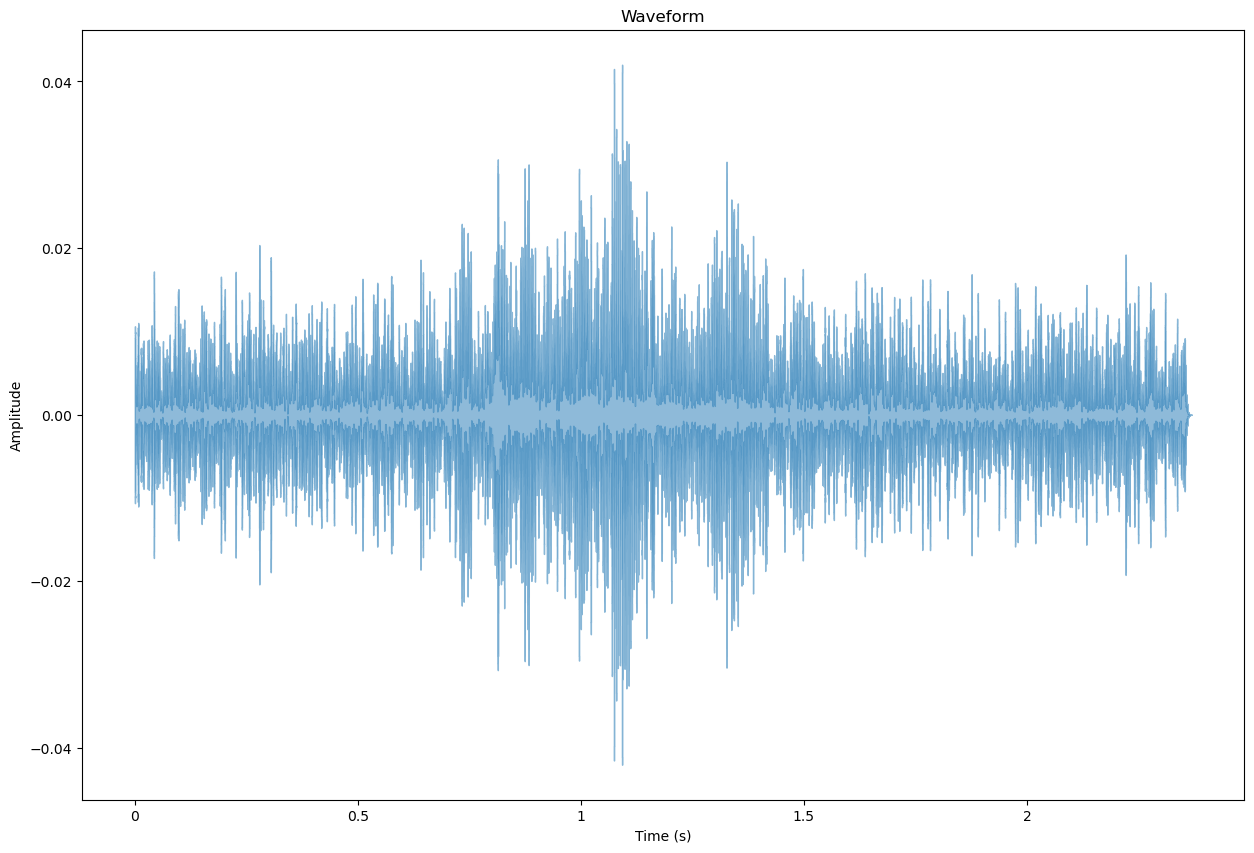

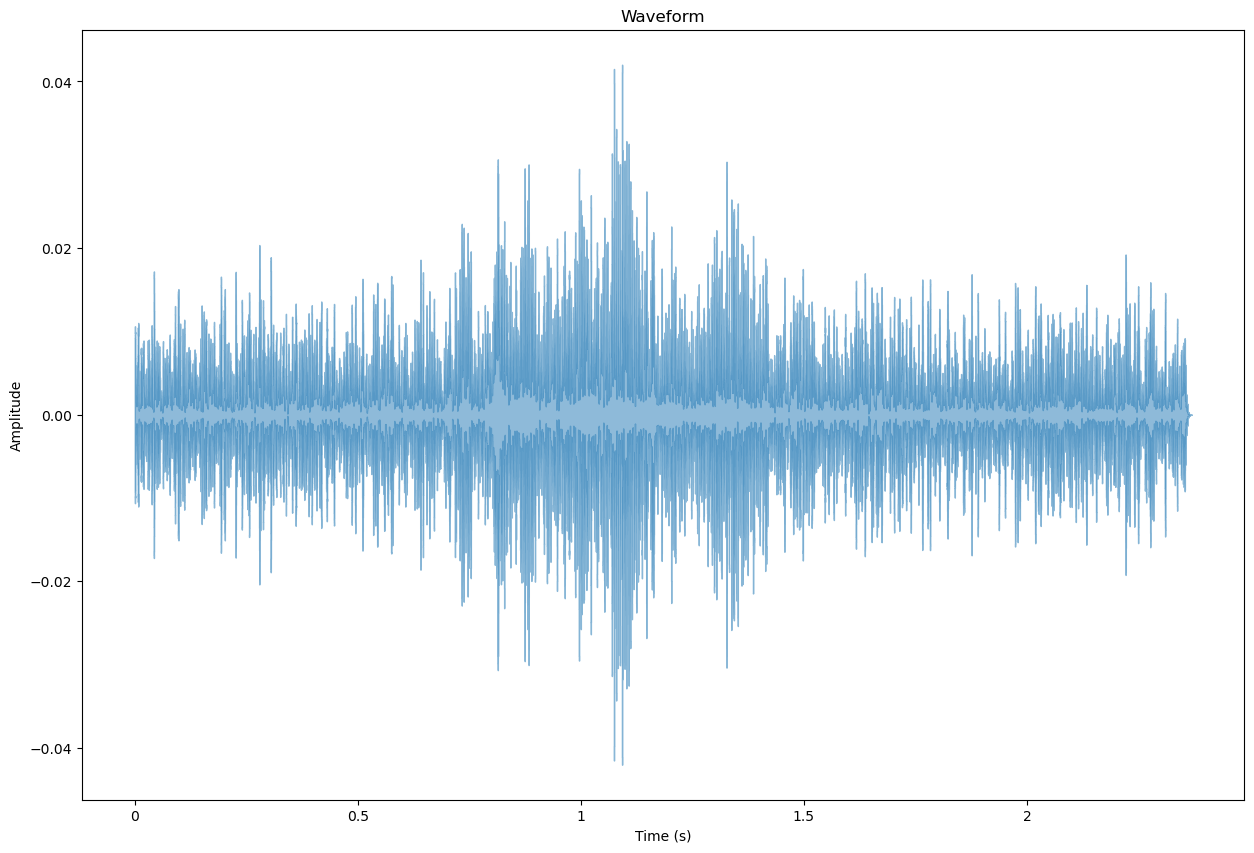

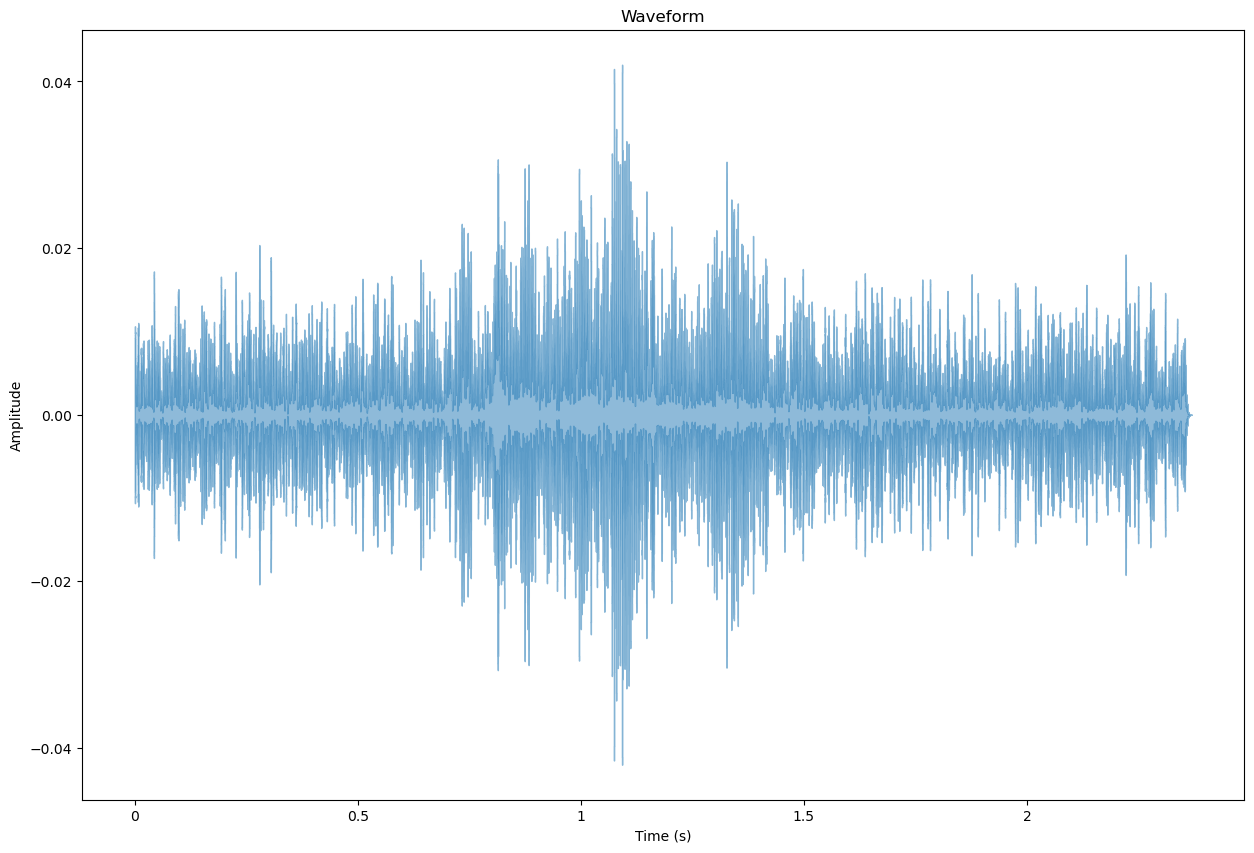

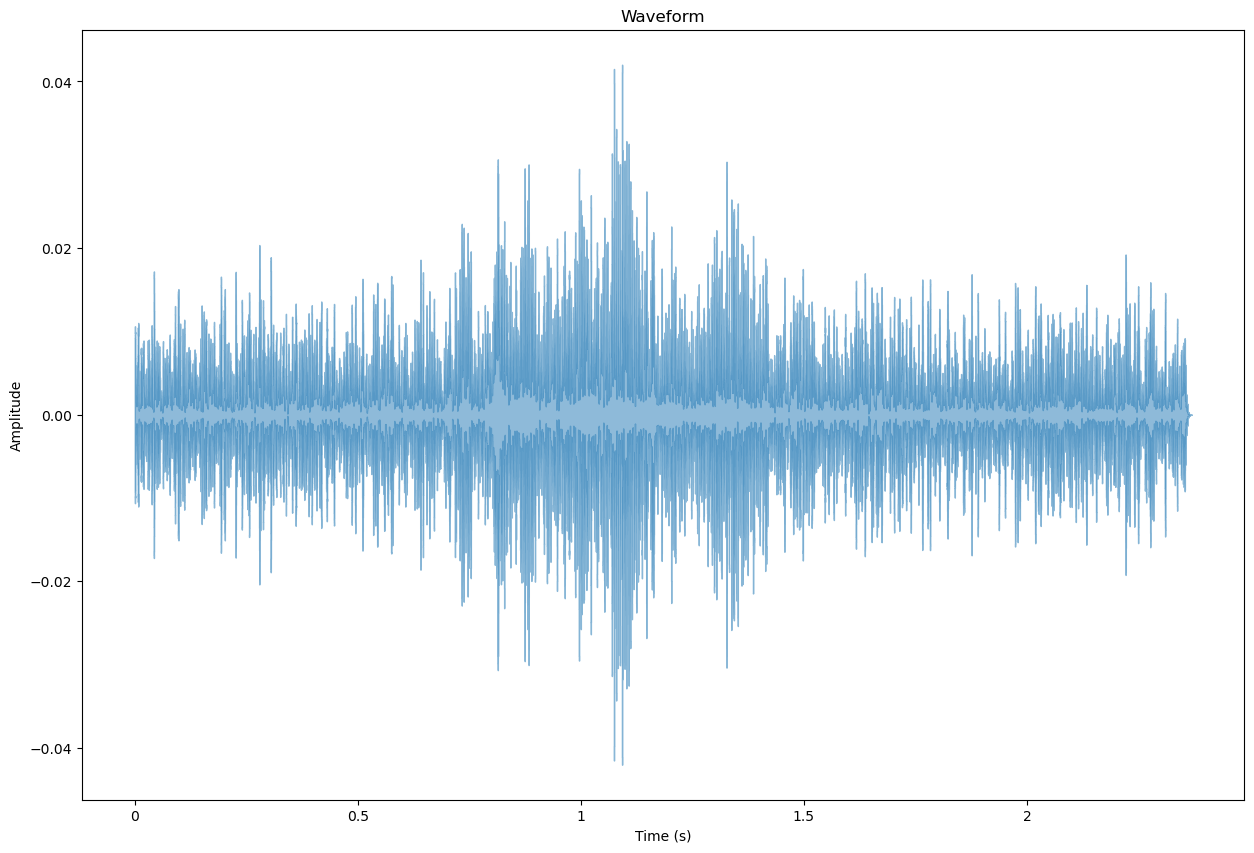

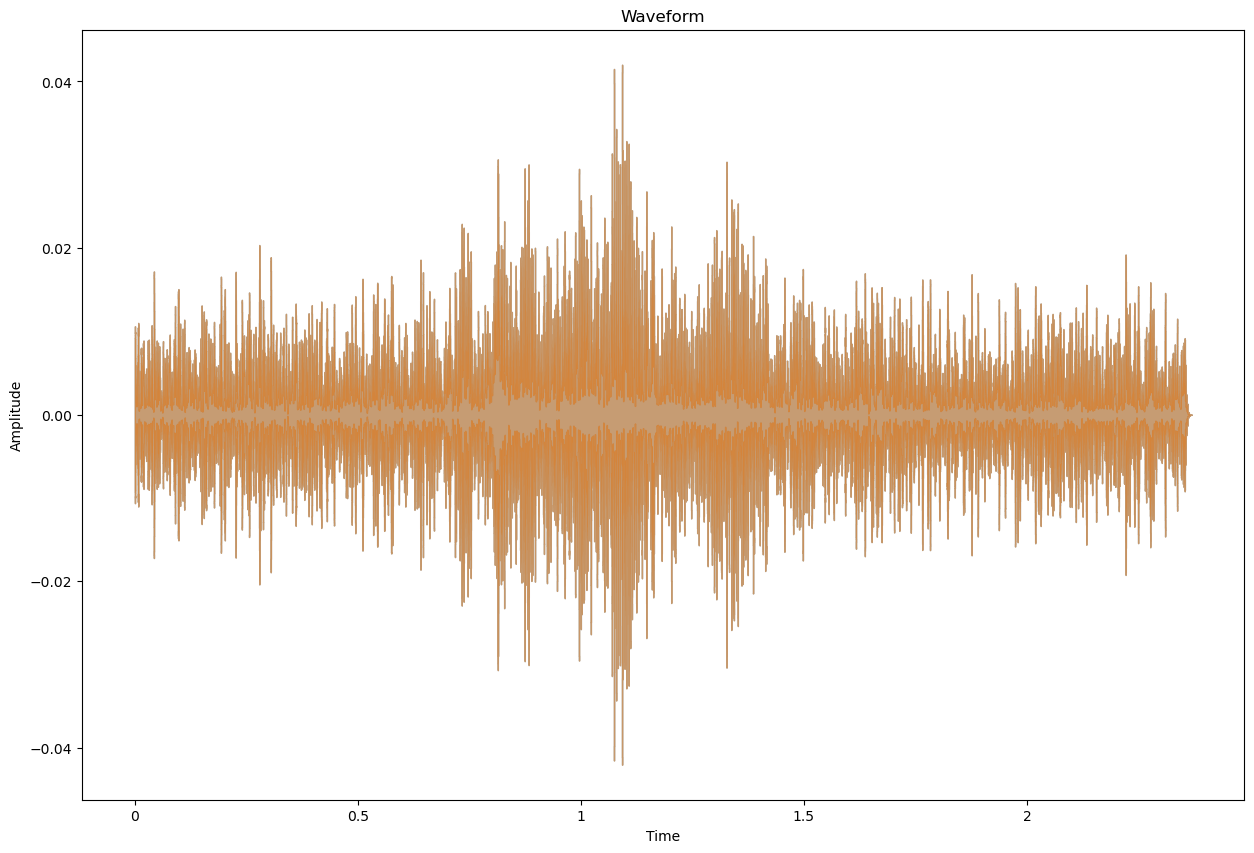

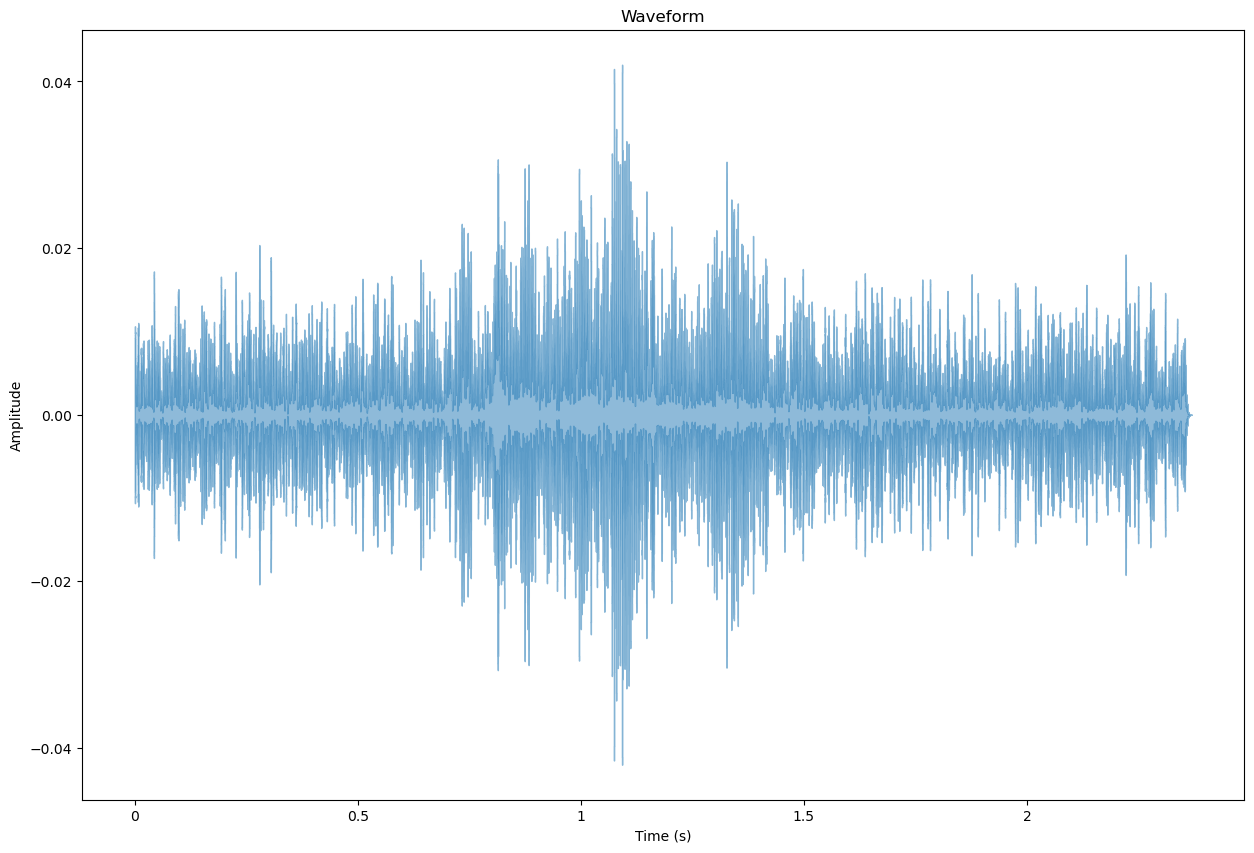

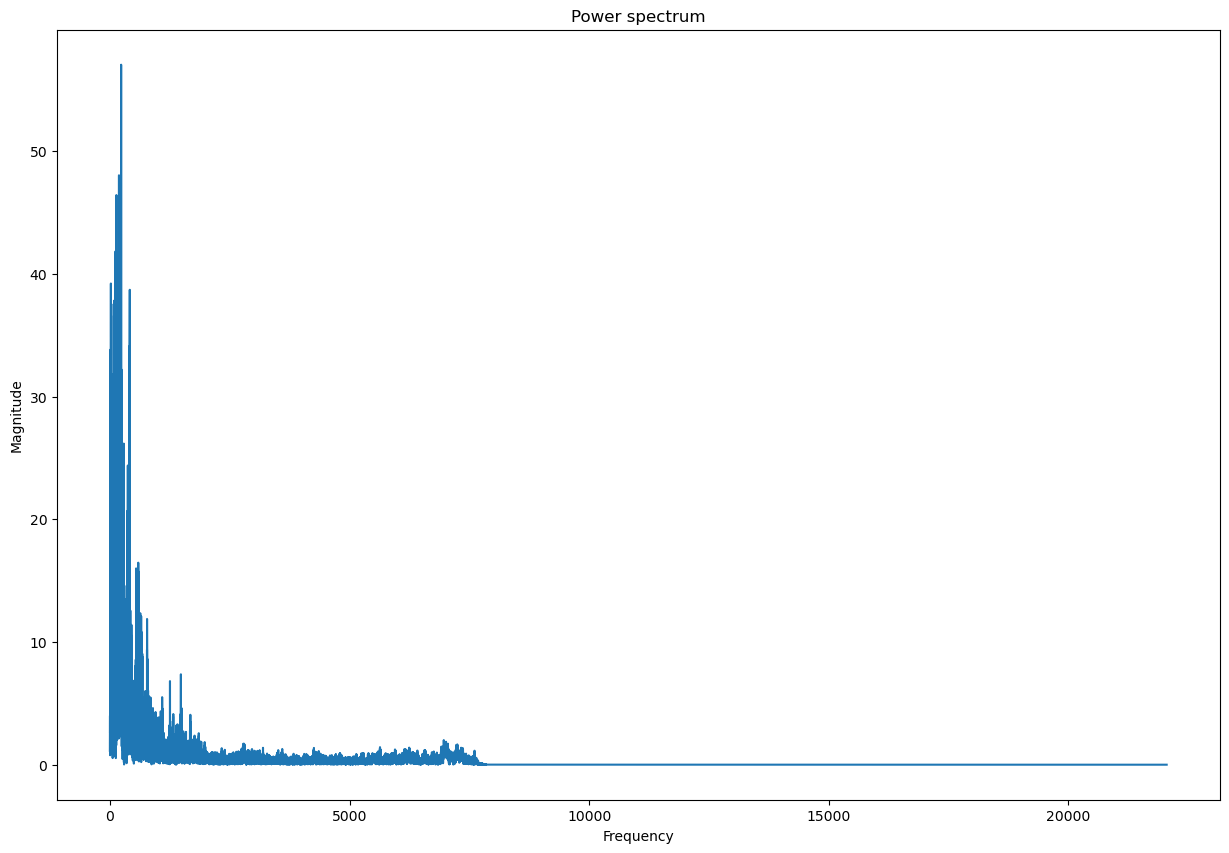

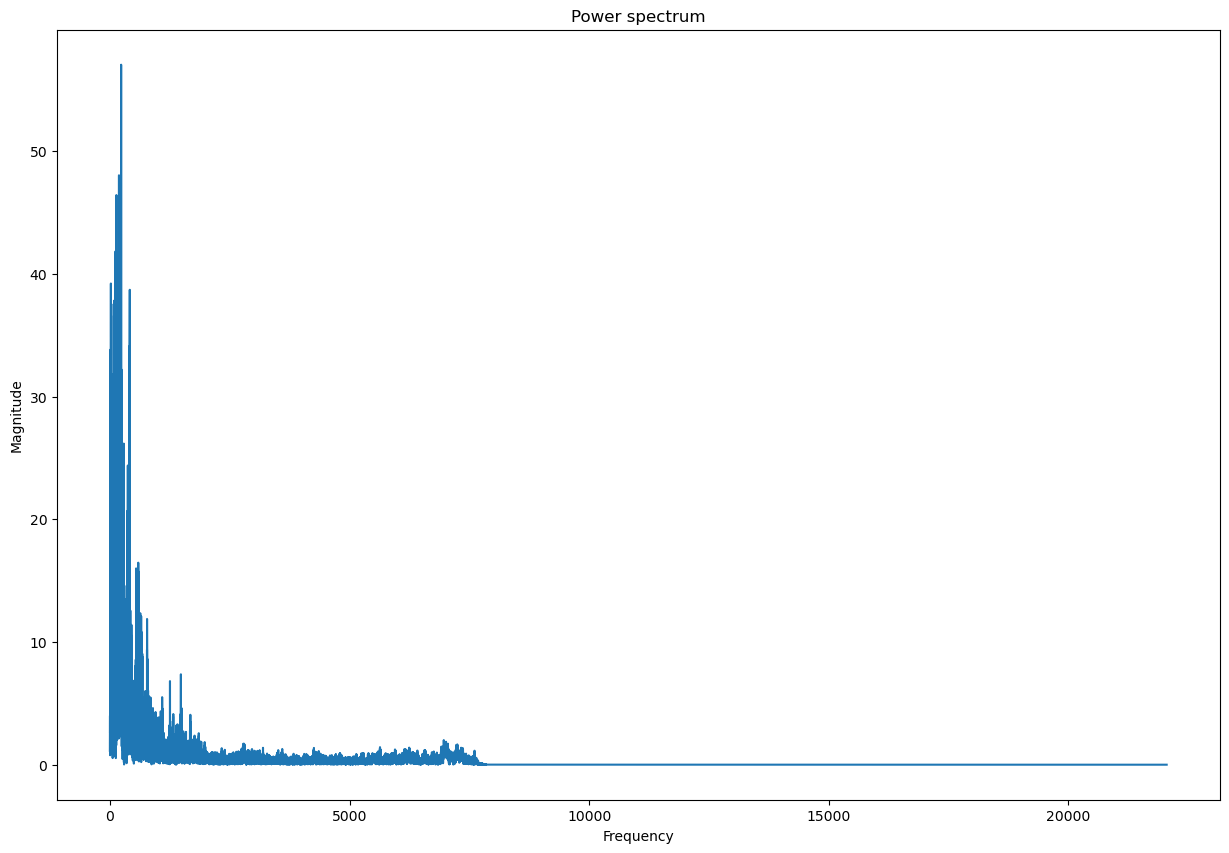

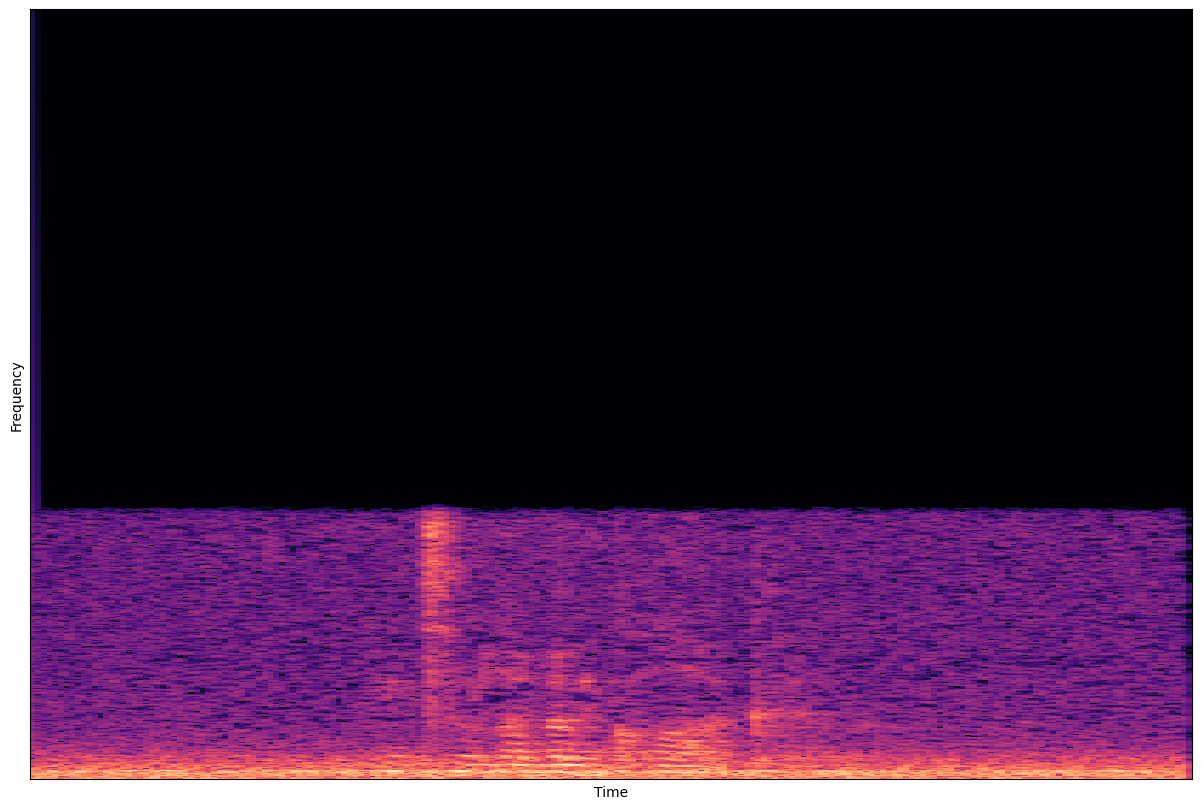

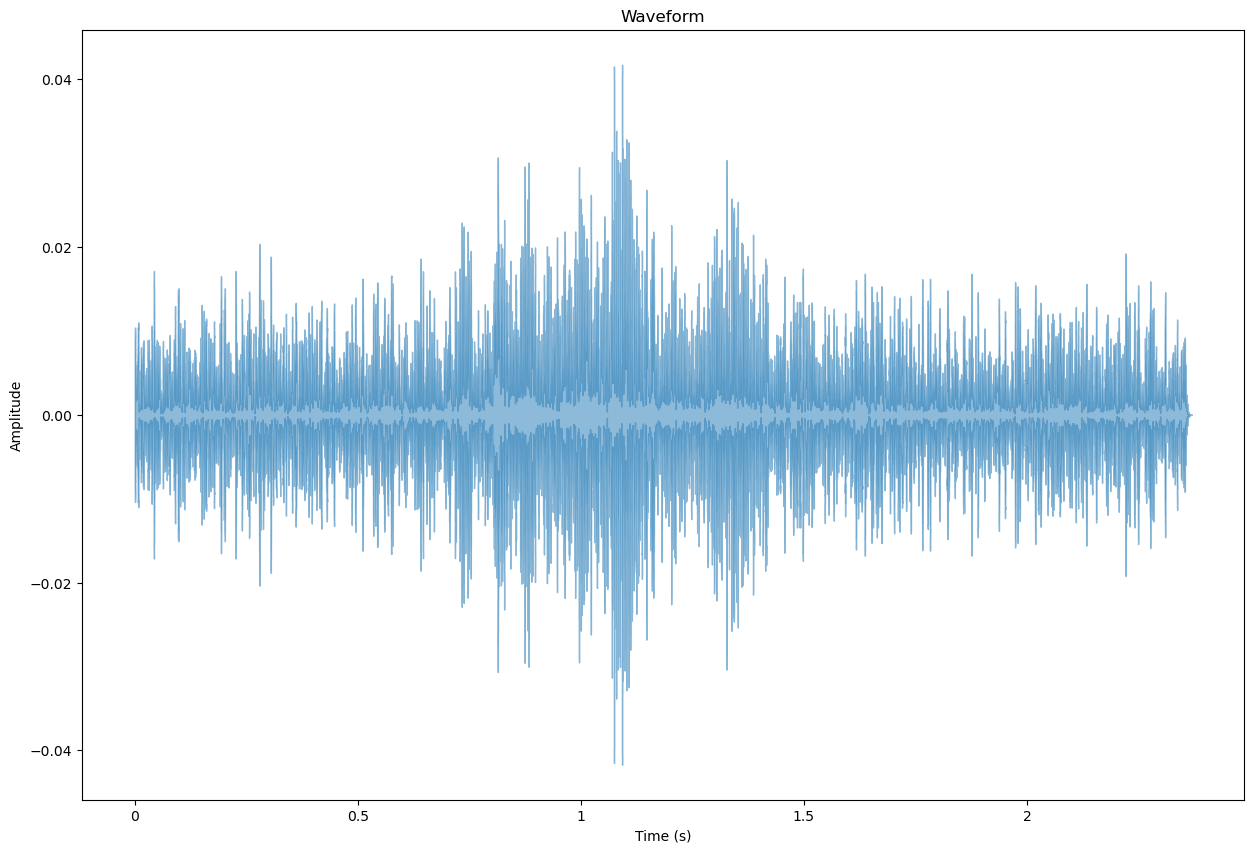

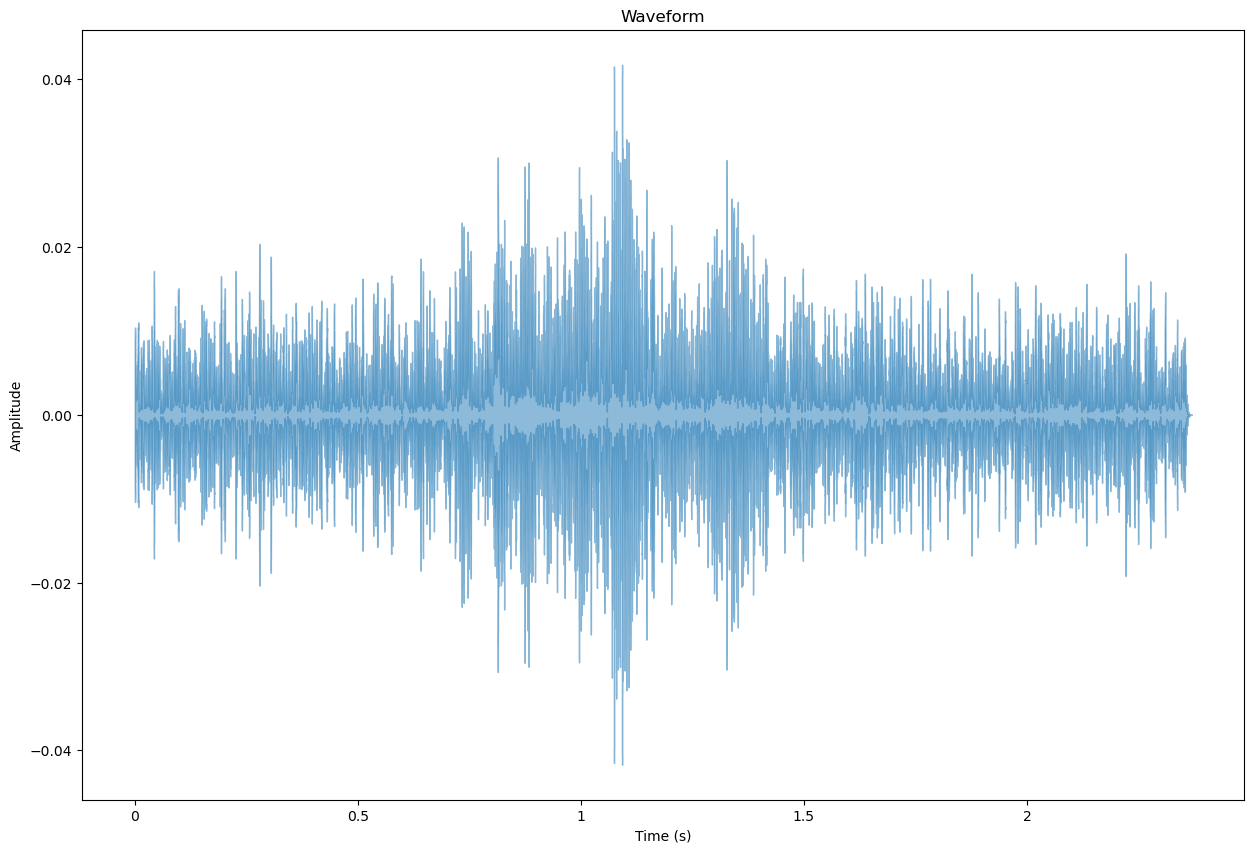

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [61]:
#waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(sig, sr = sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

Text(0.5, 1.0, 'Power spectrum')

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

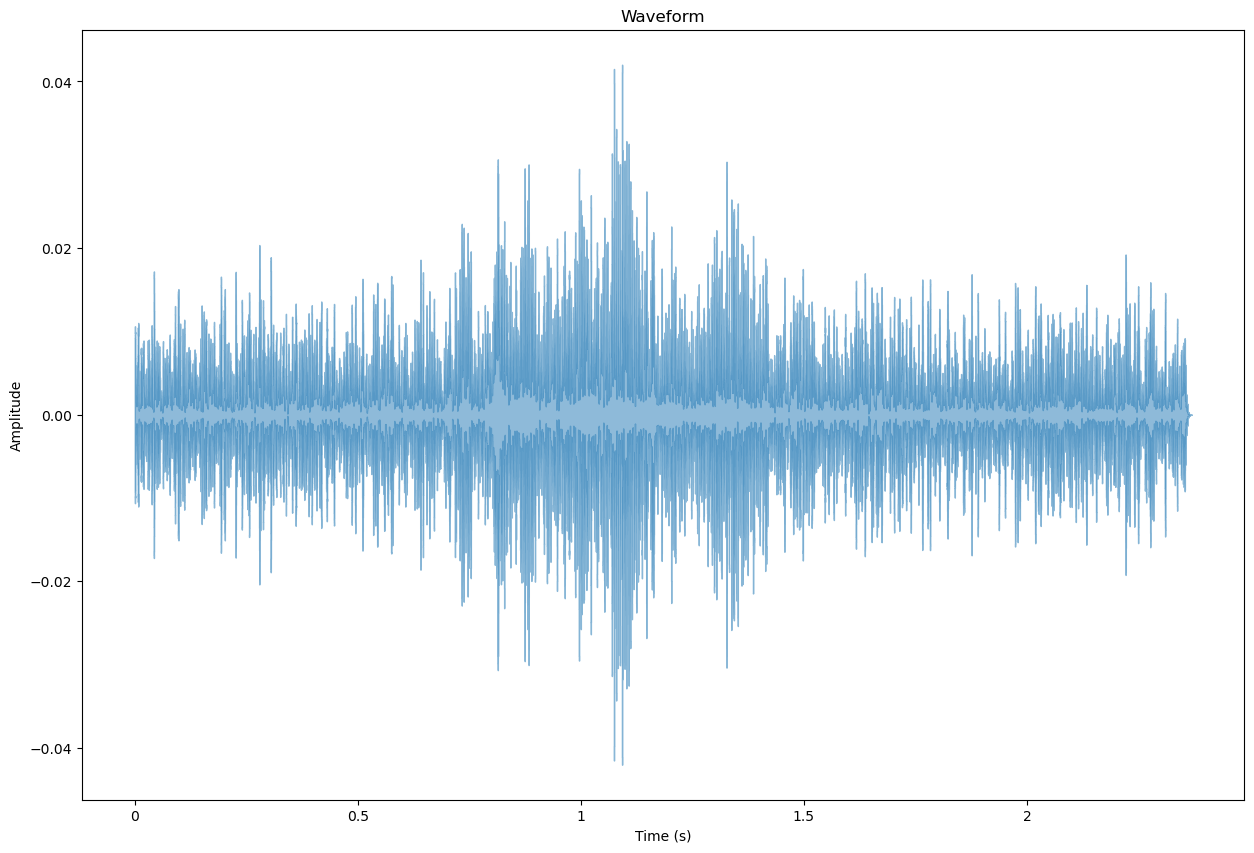

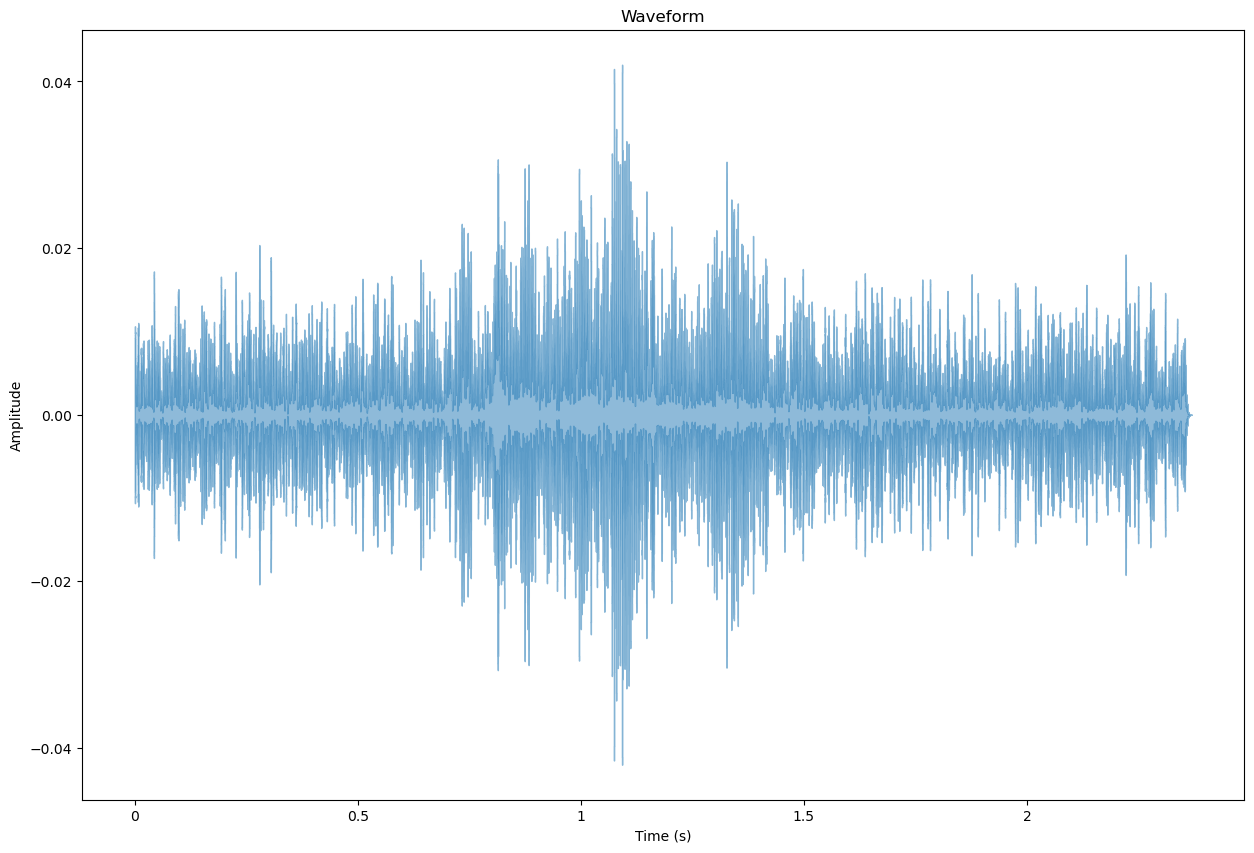

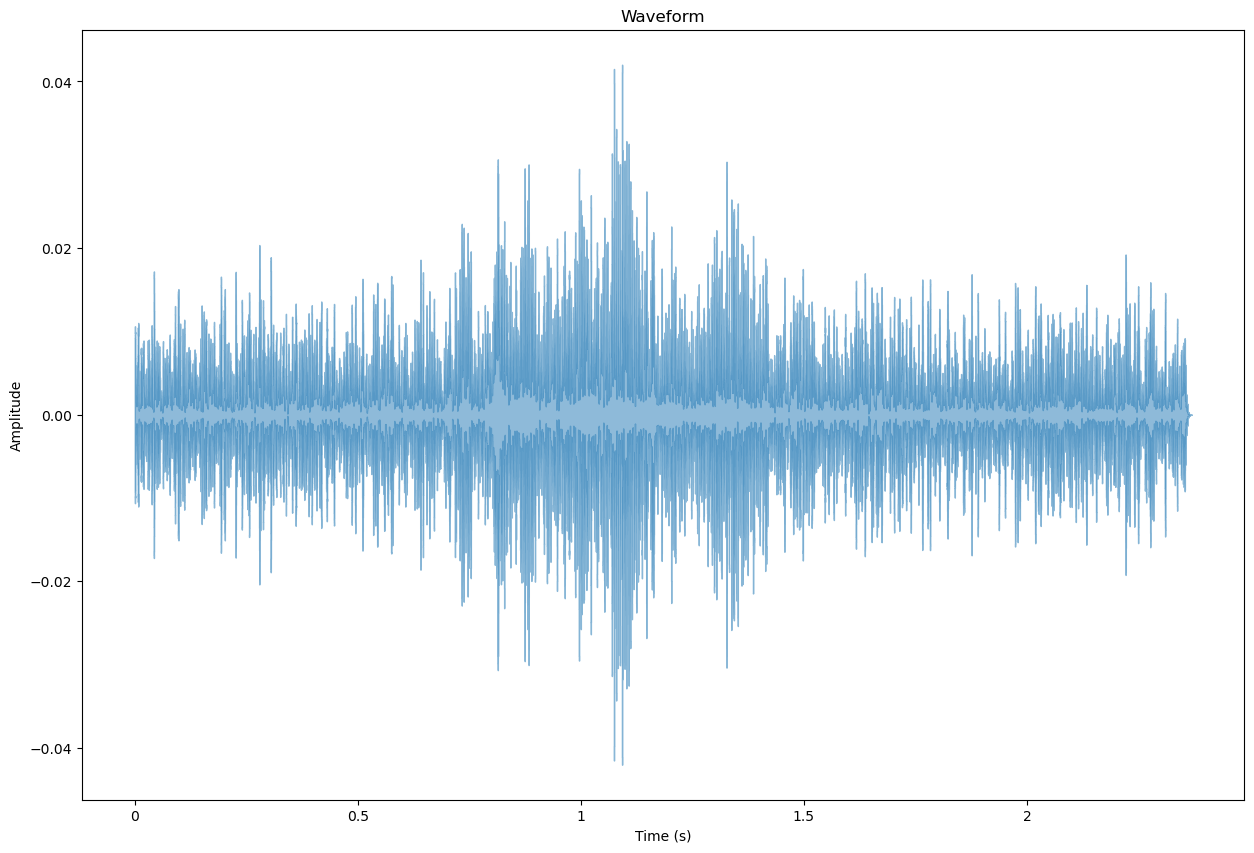

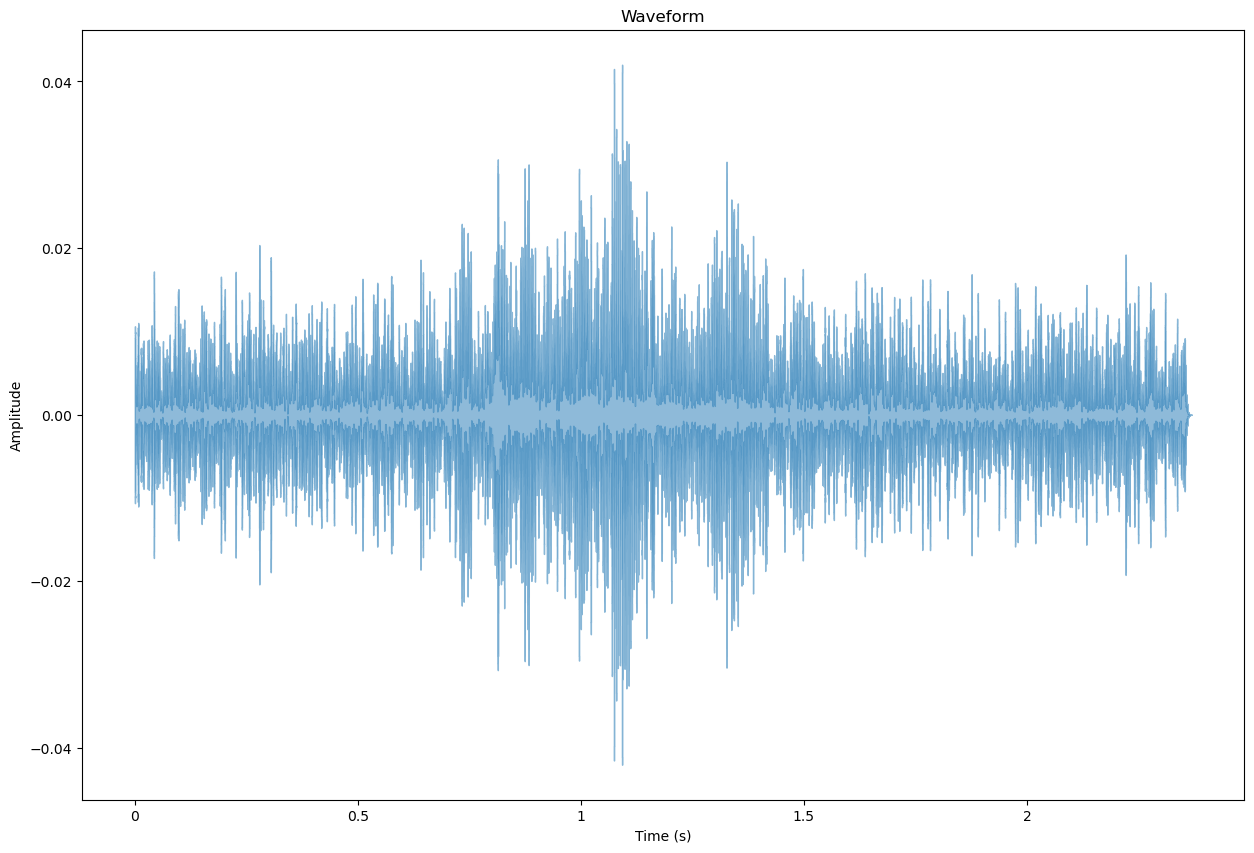

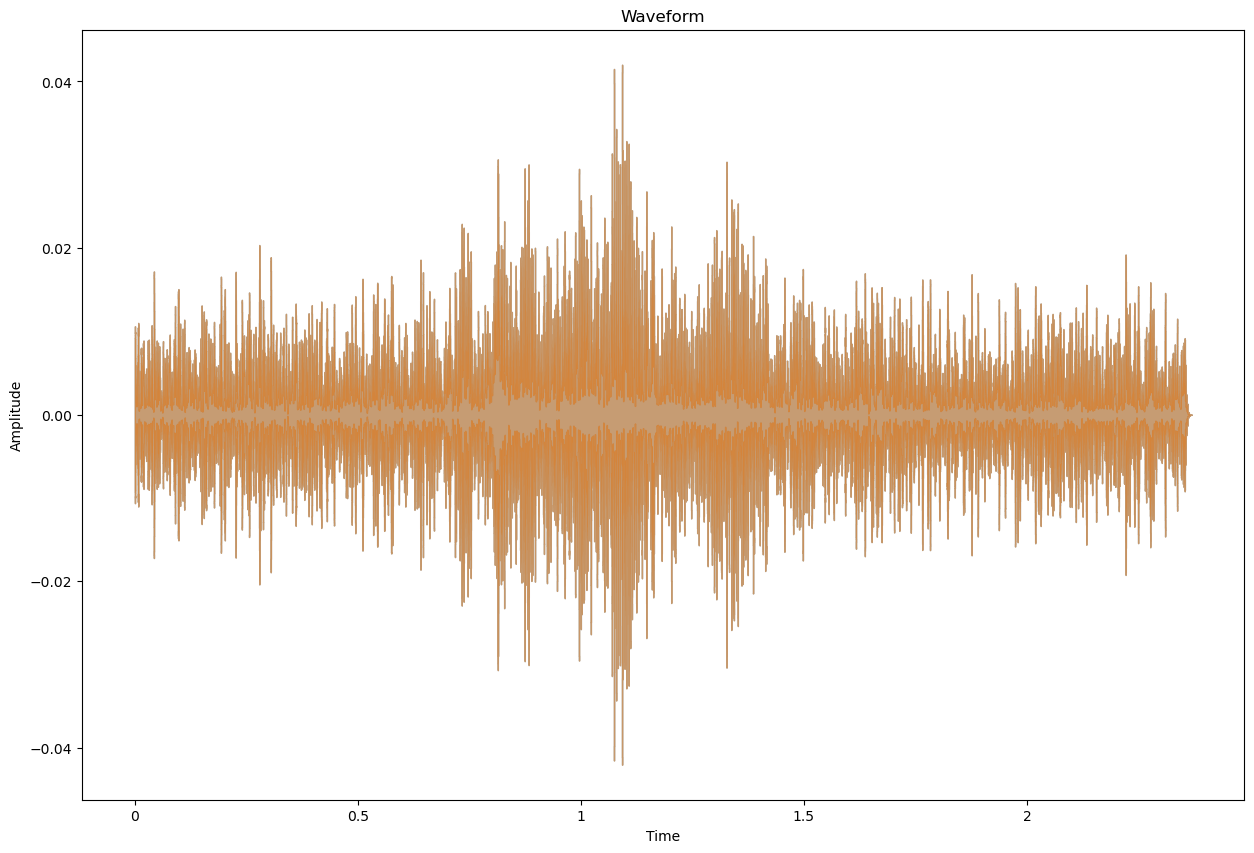

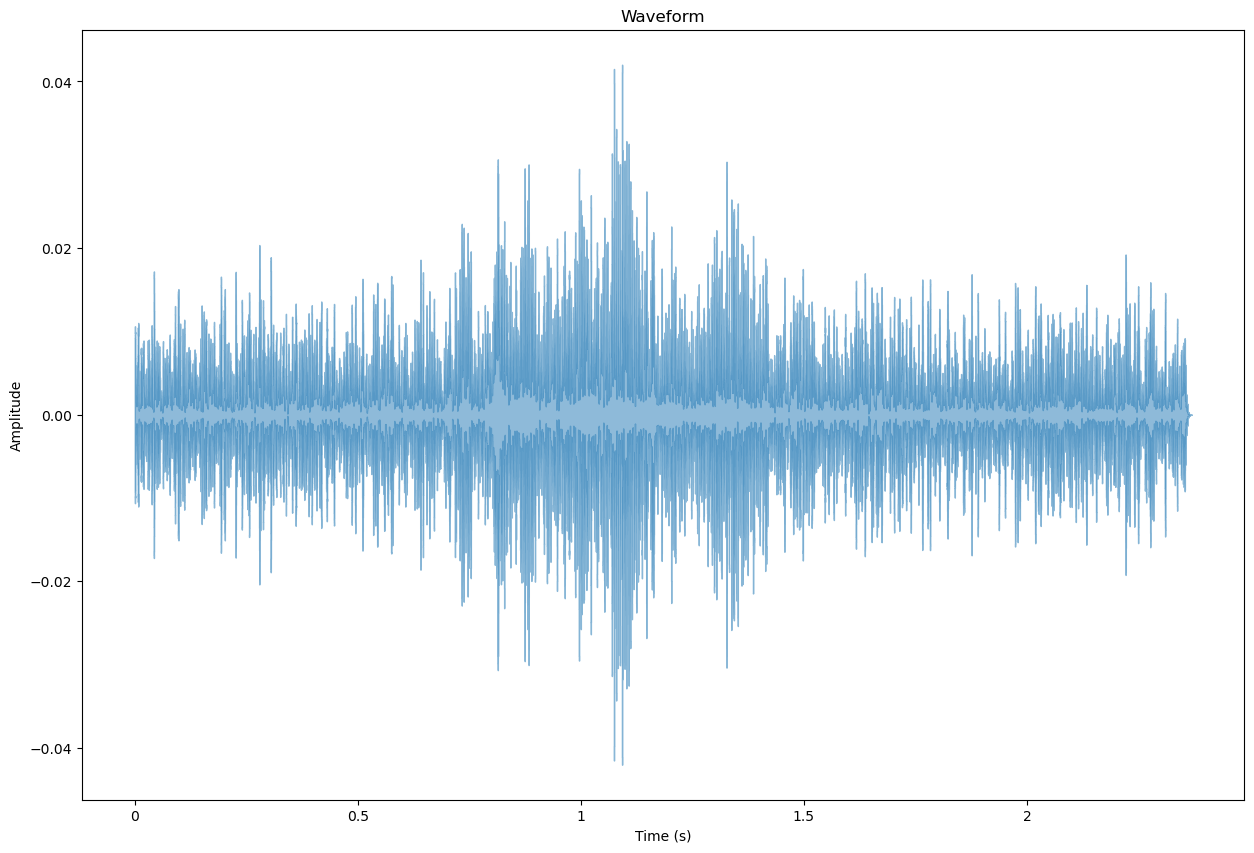

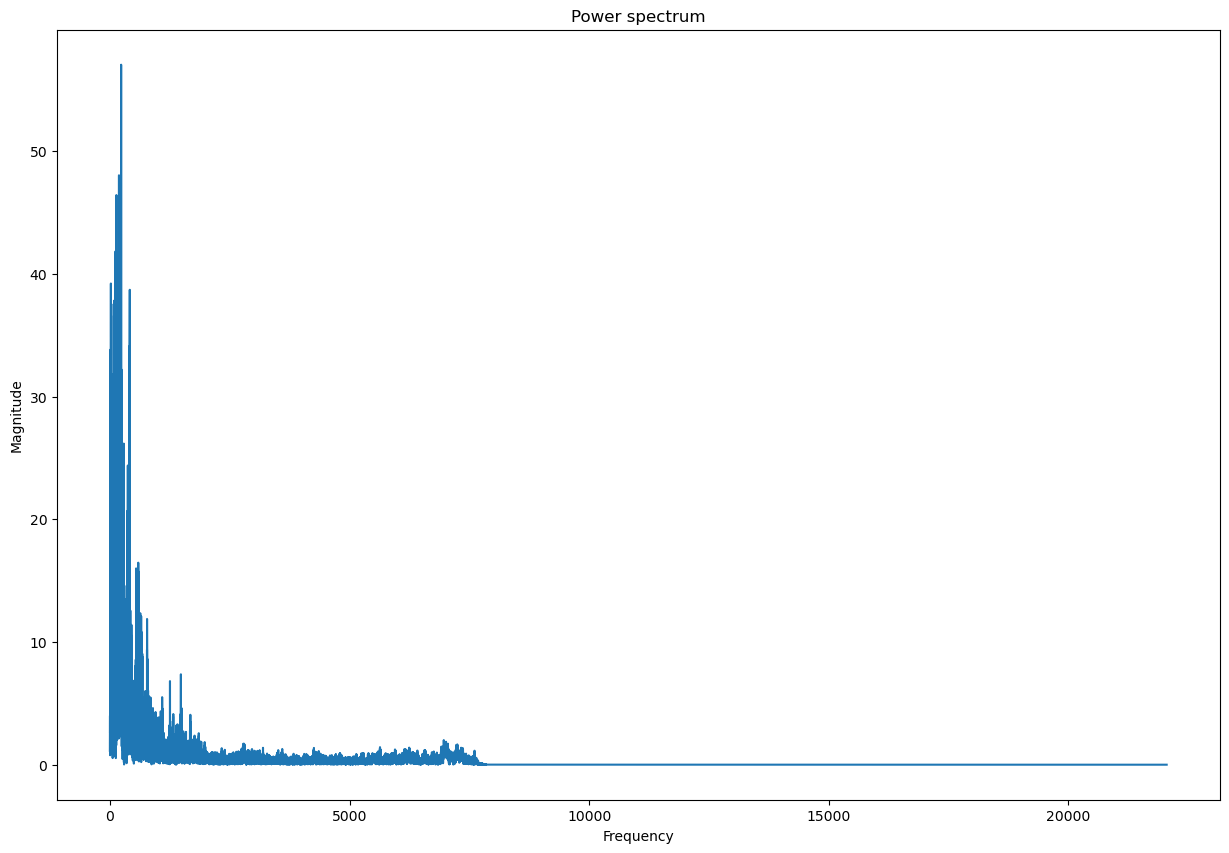

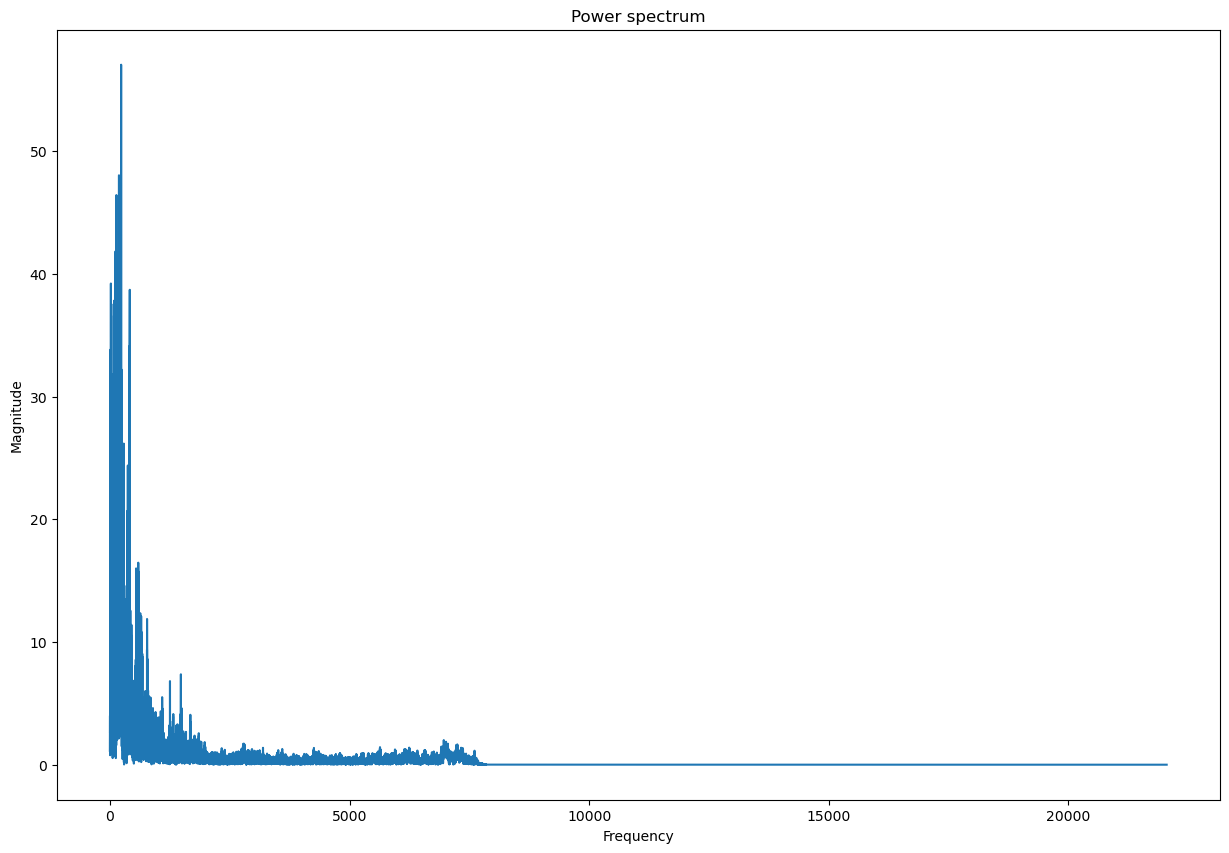

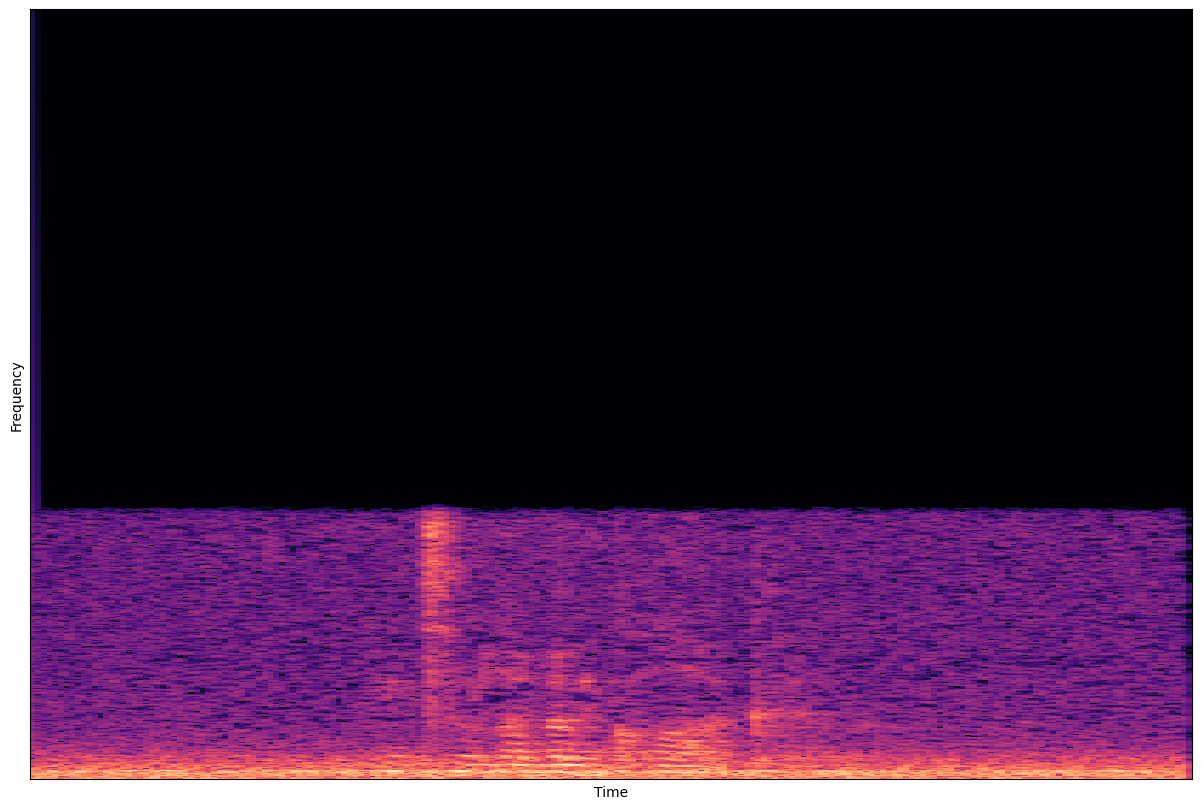

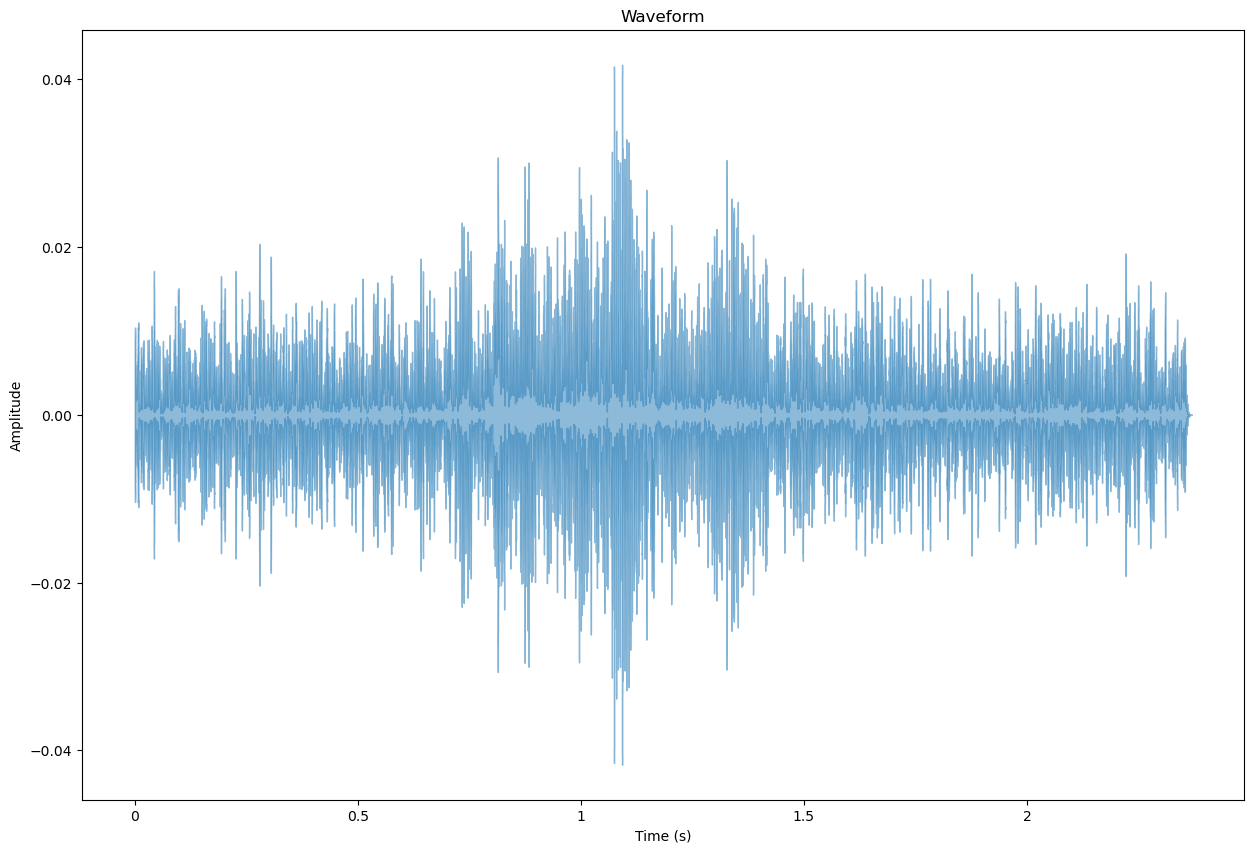

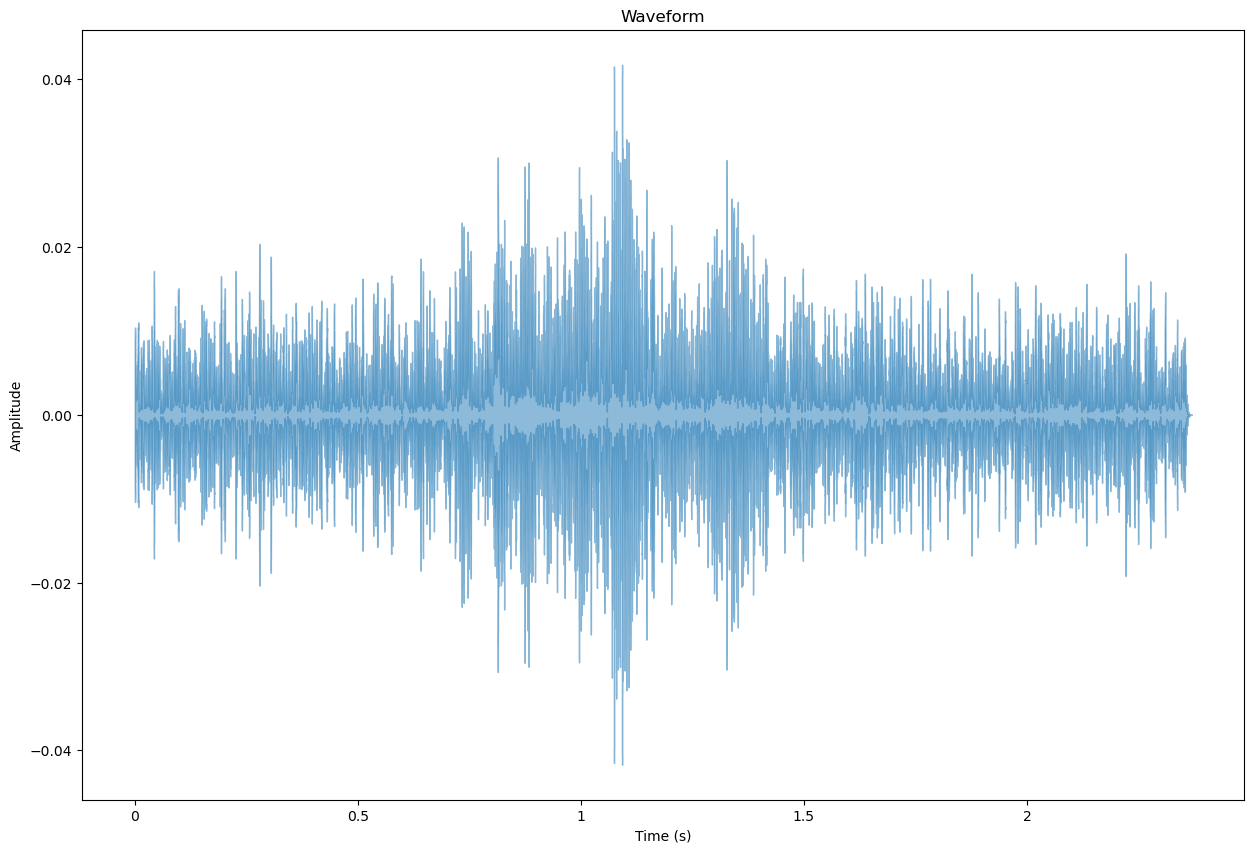

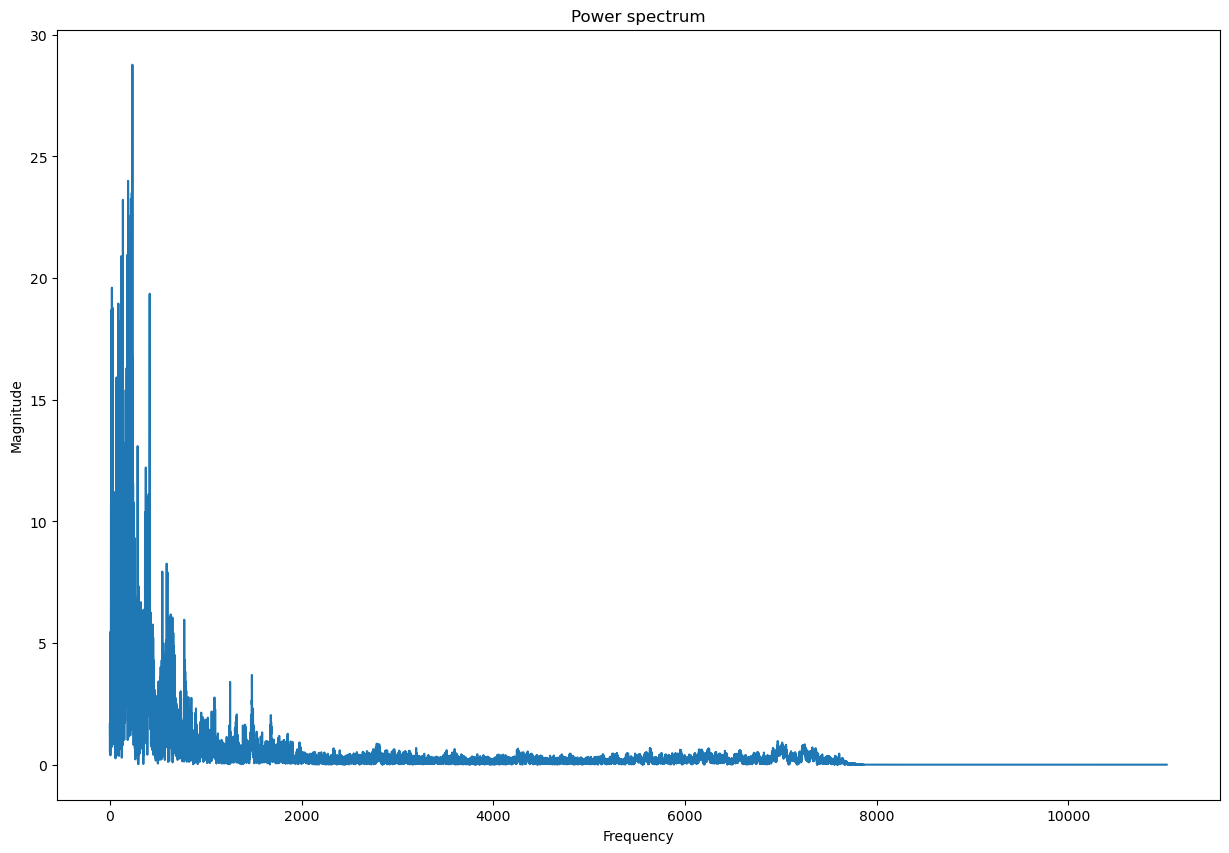

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [62]:
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

AttributeError: module 'matplotlib' has no attribute 'axes'

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

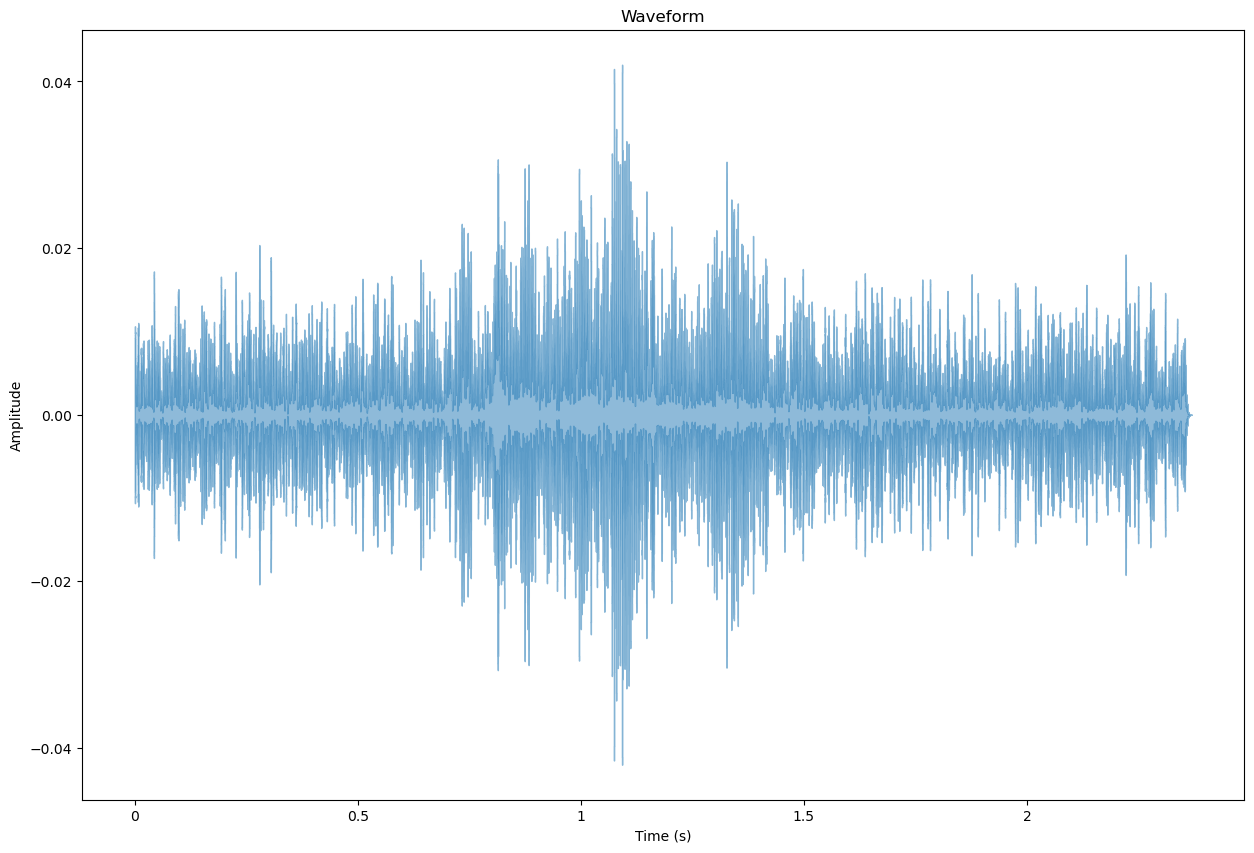

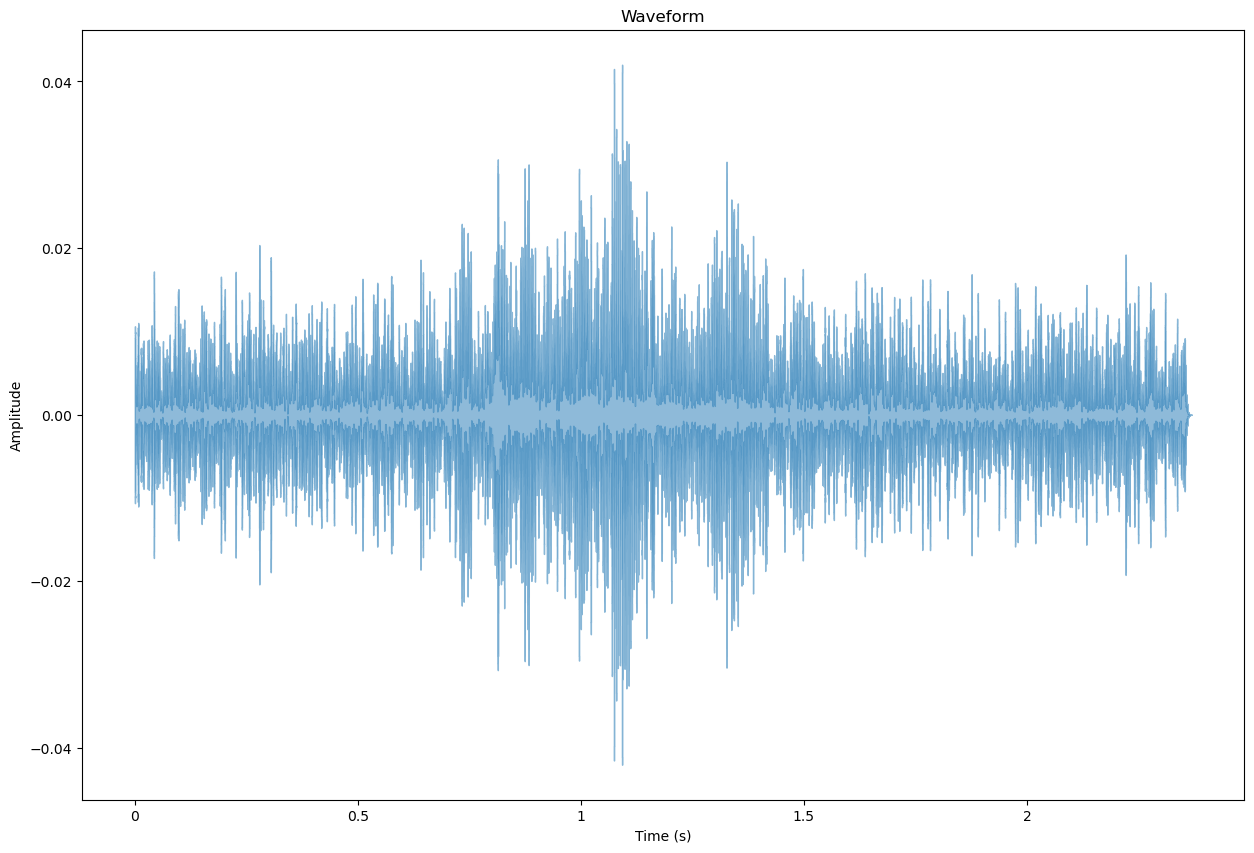

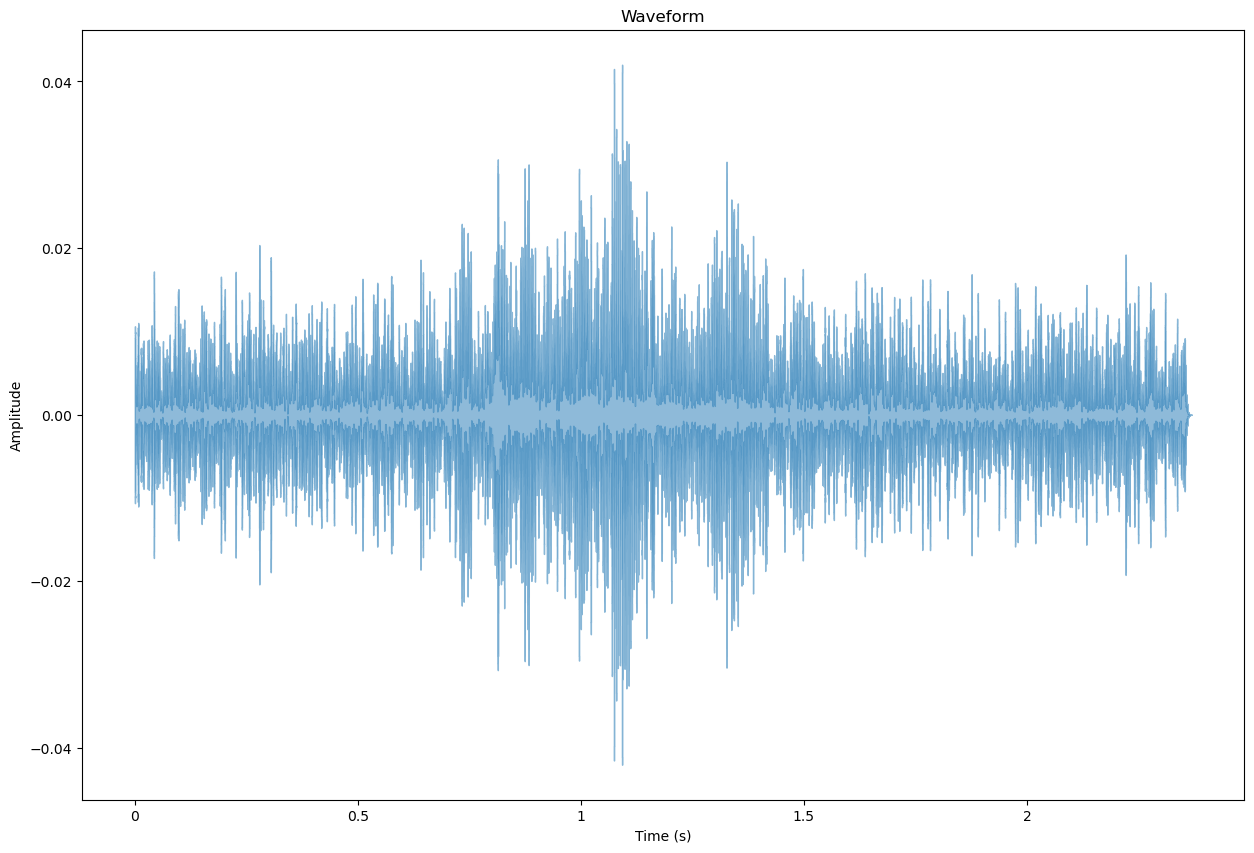

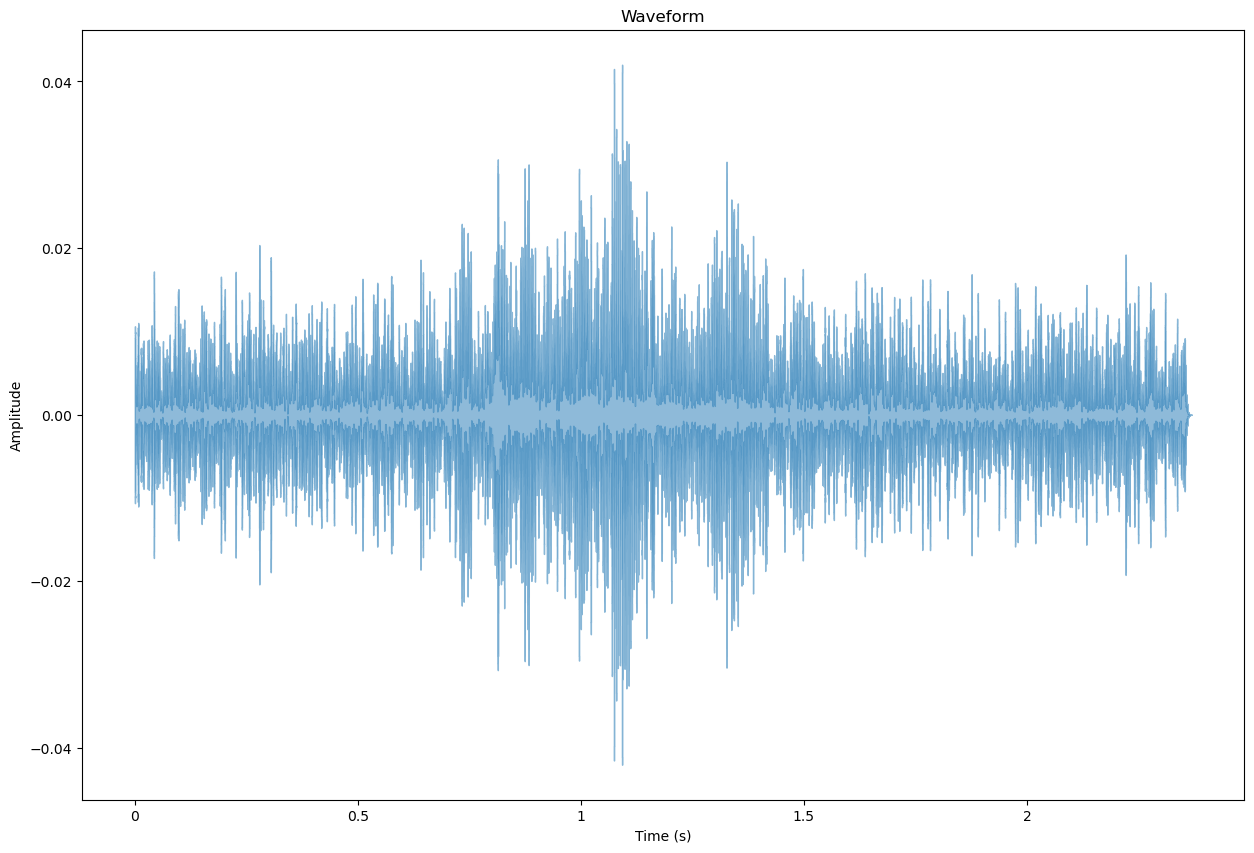

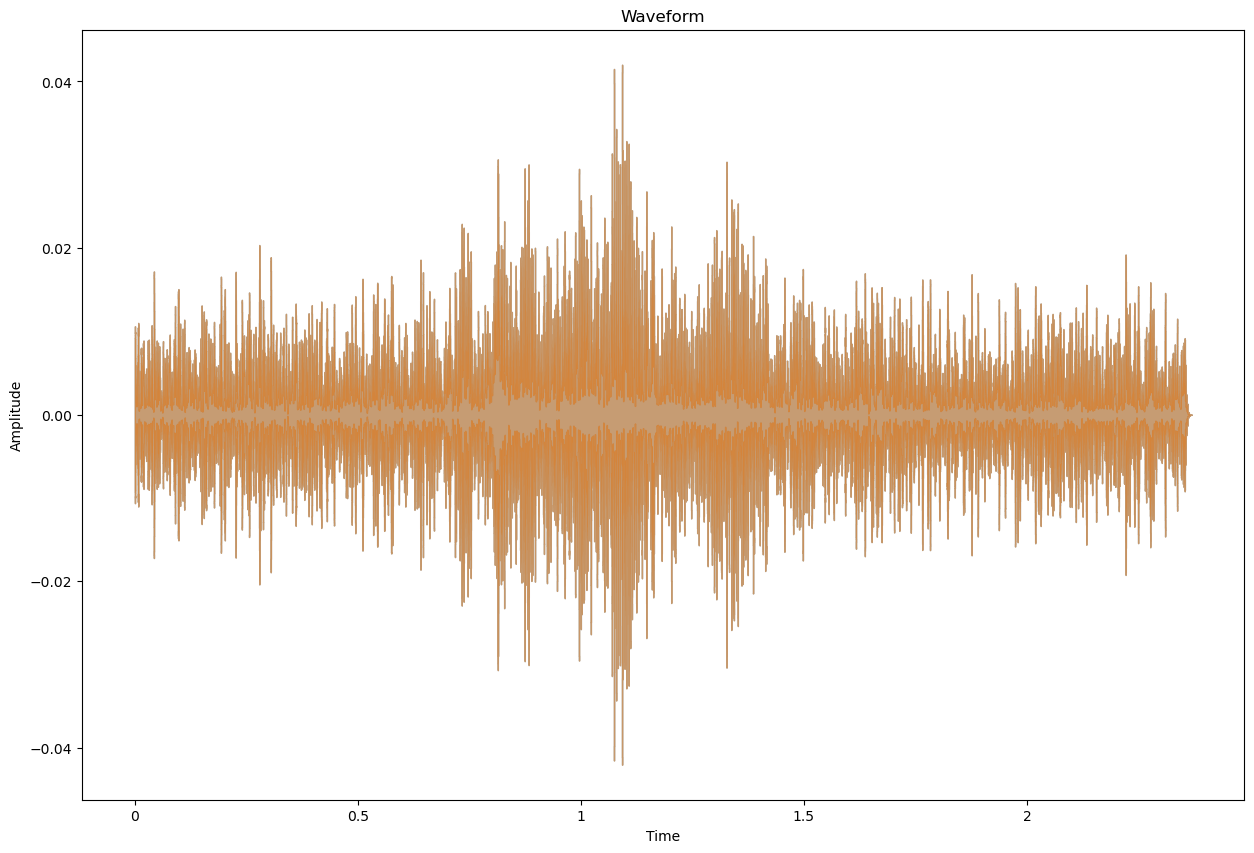

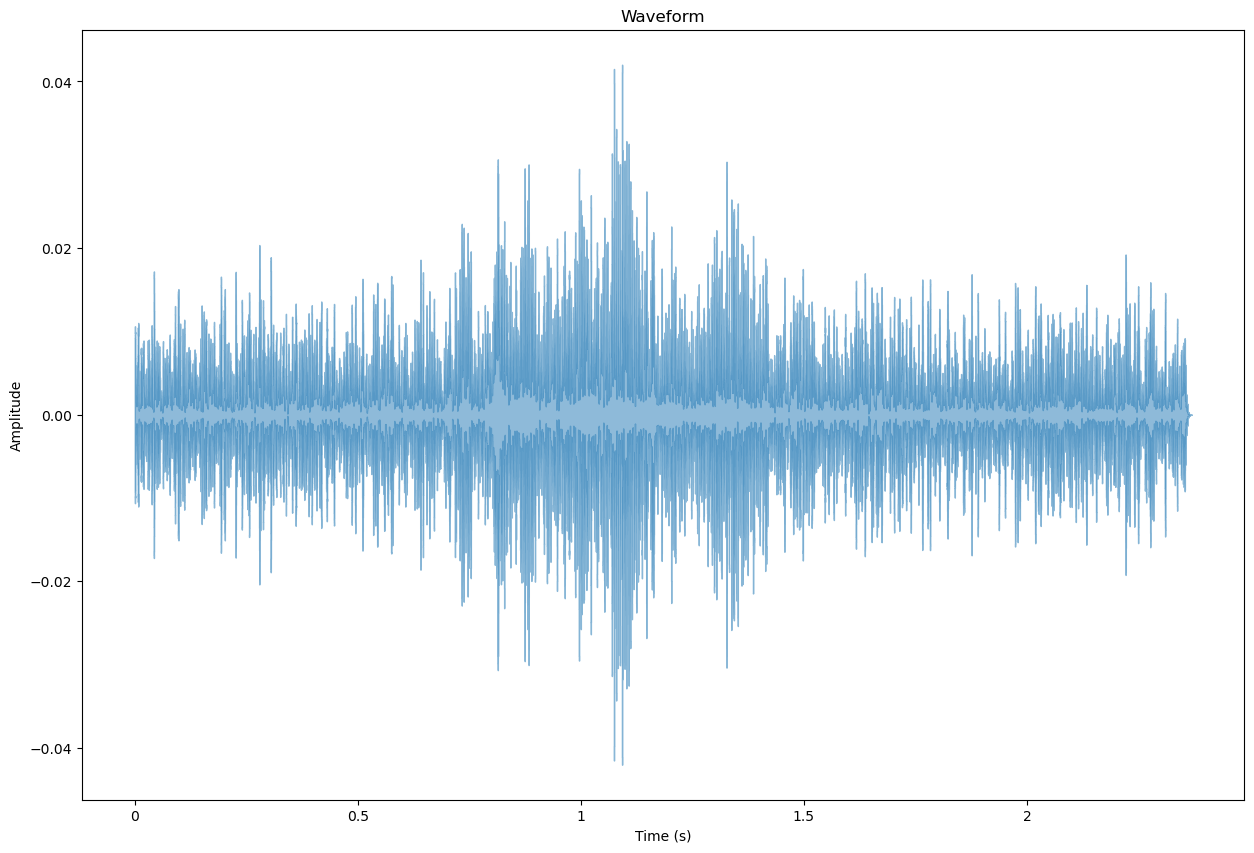

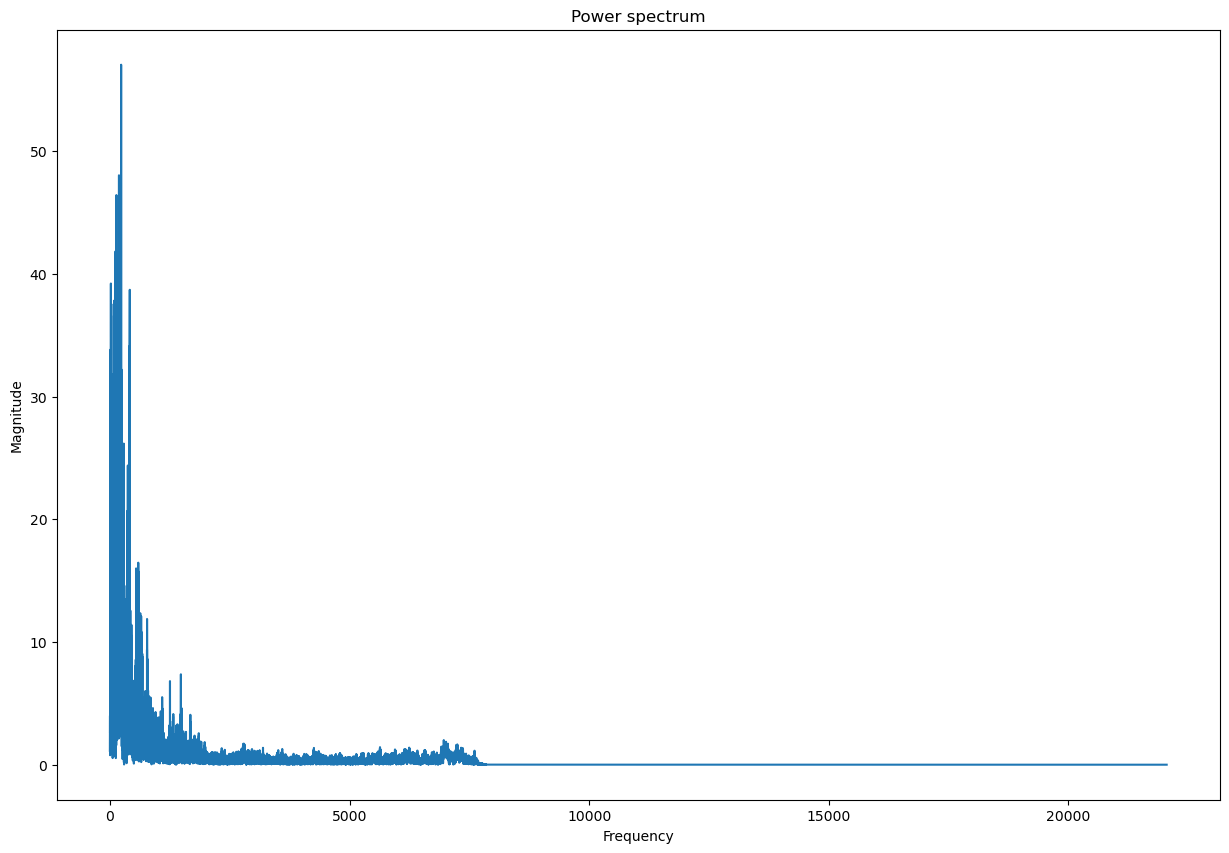

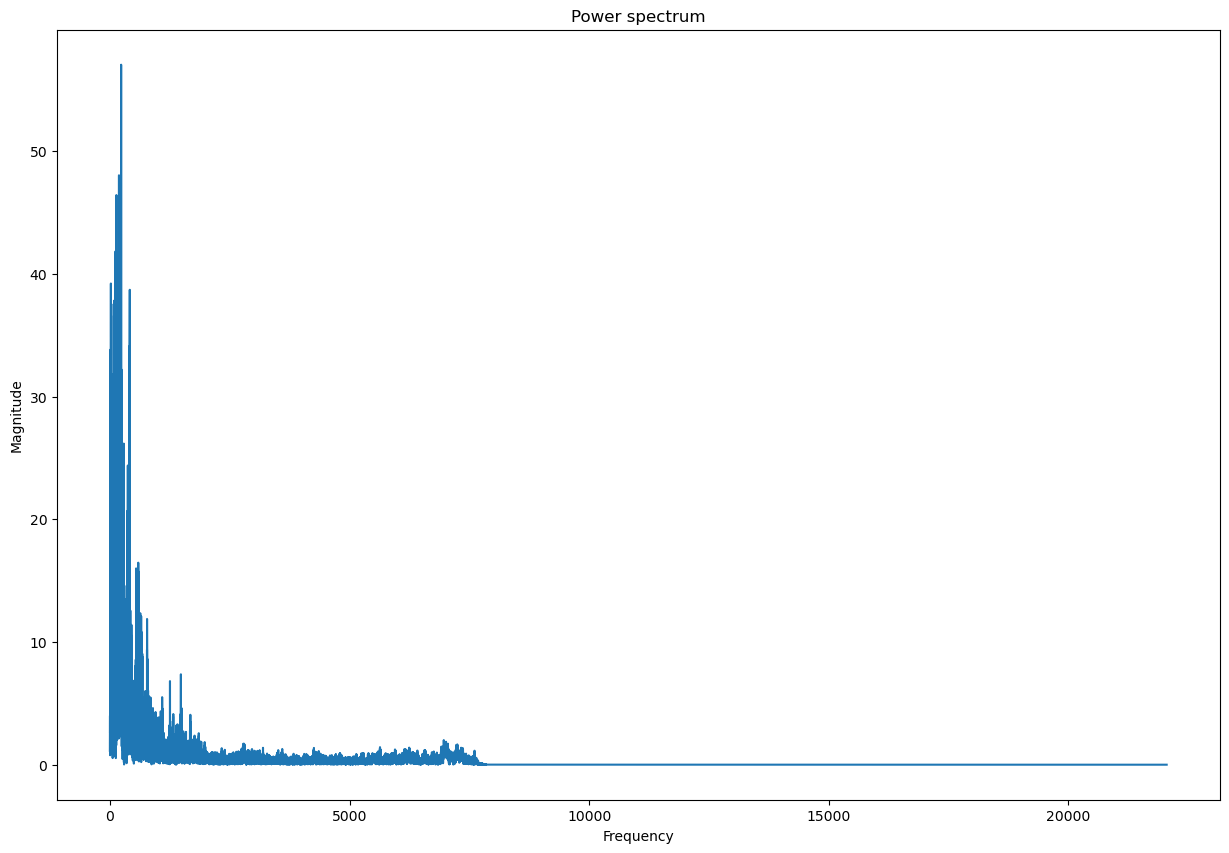

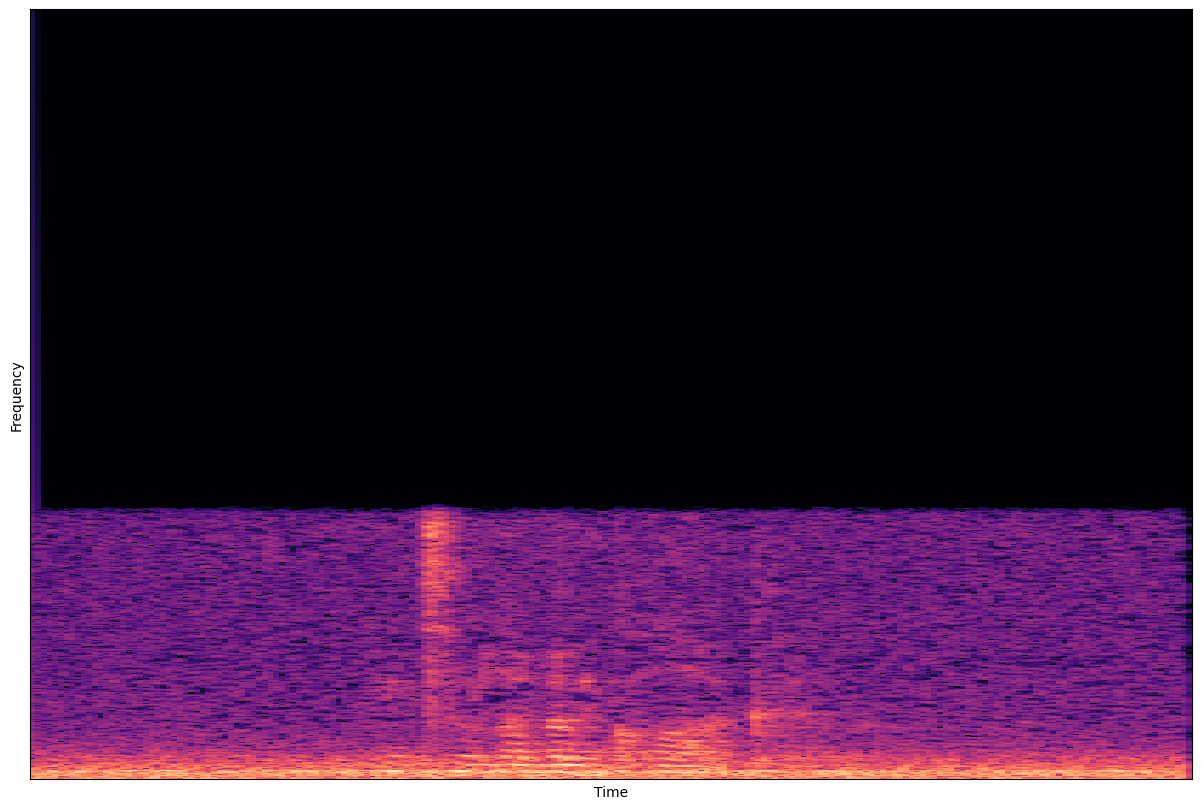

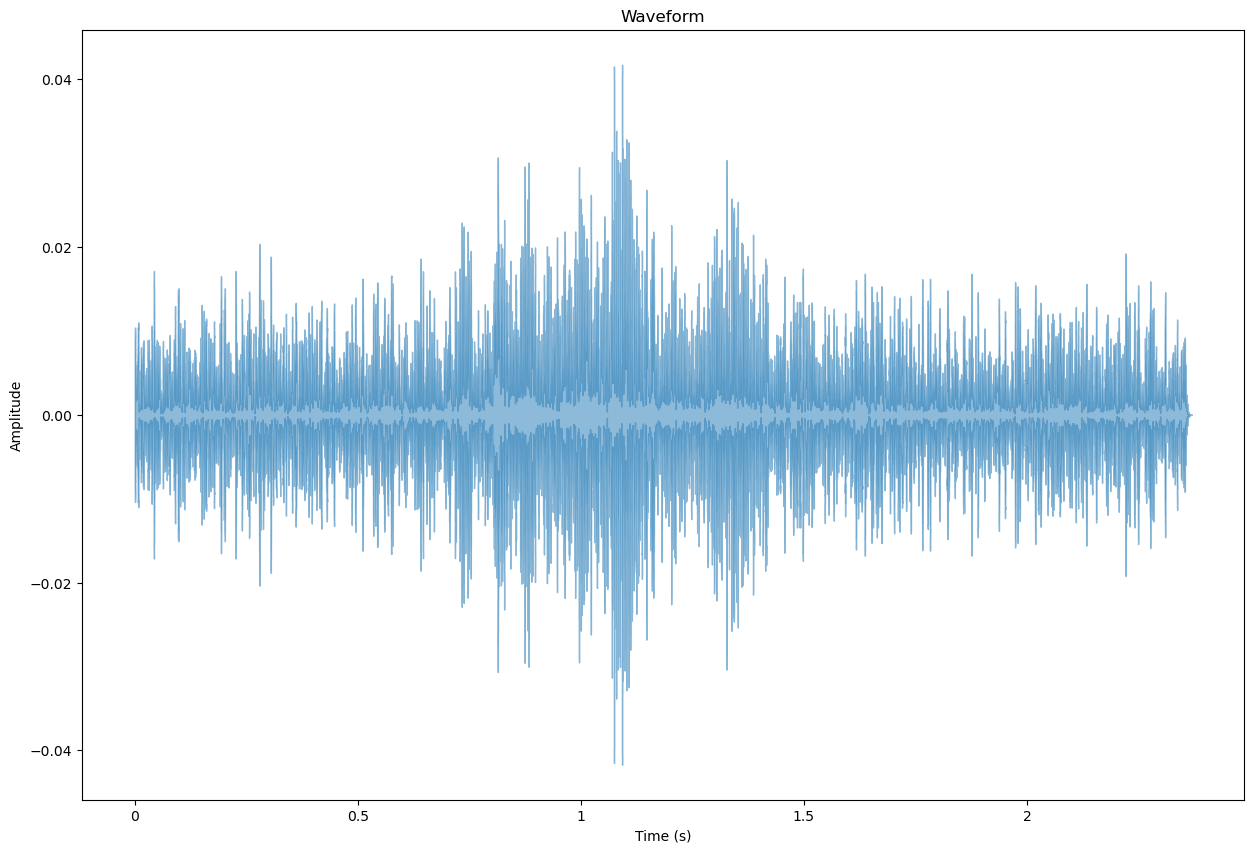

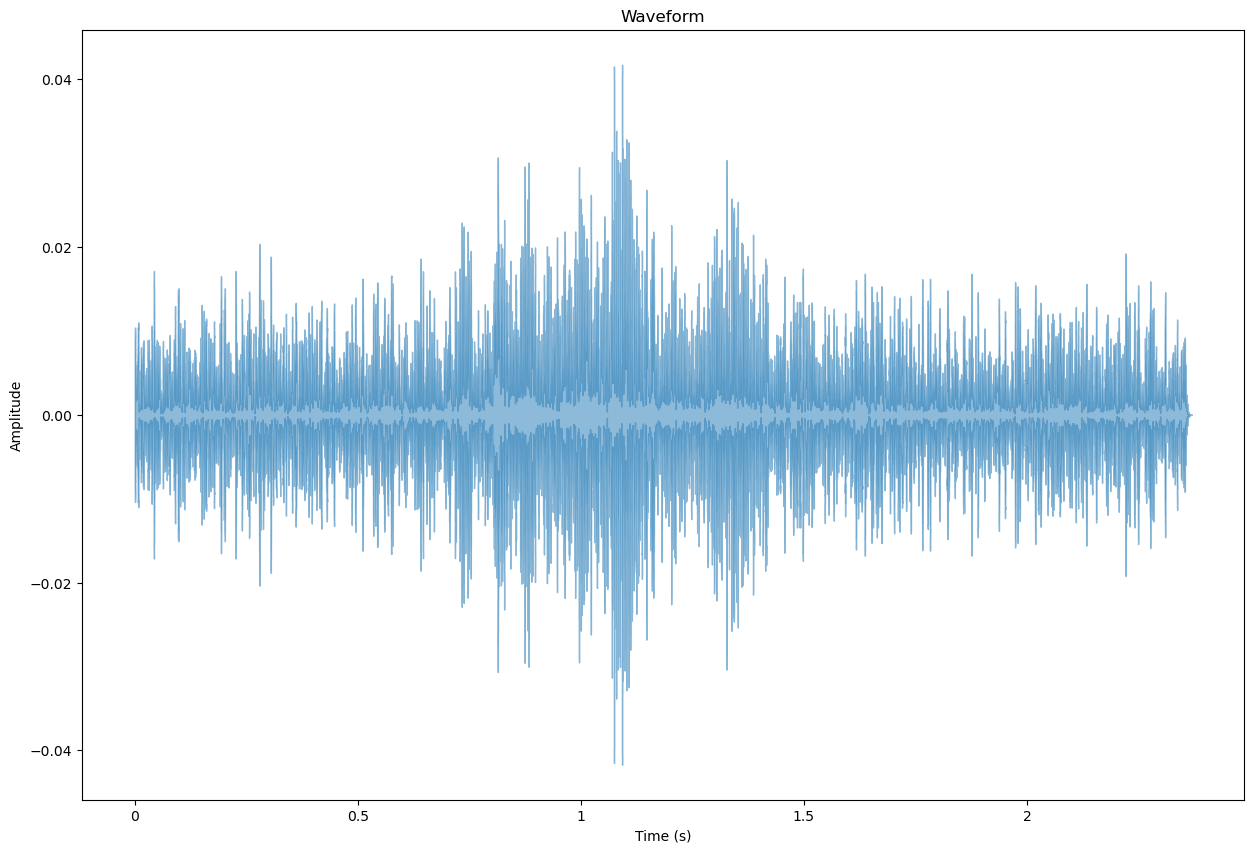

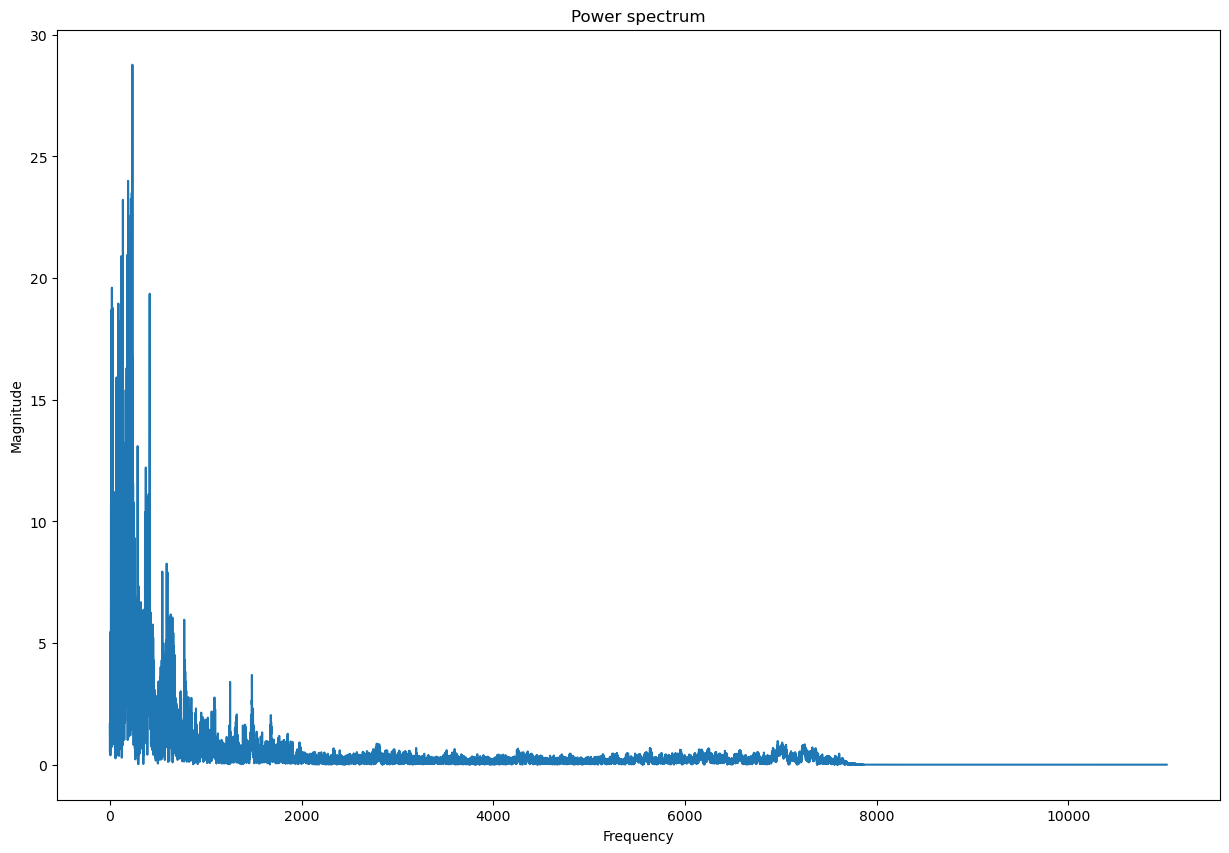

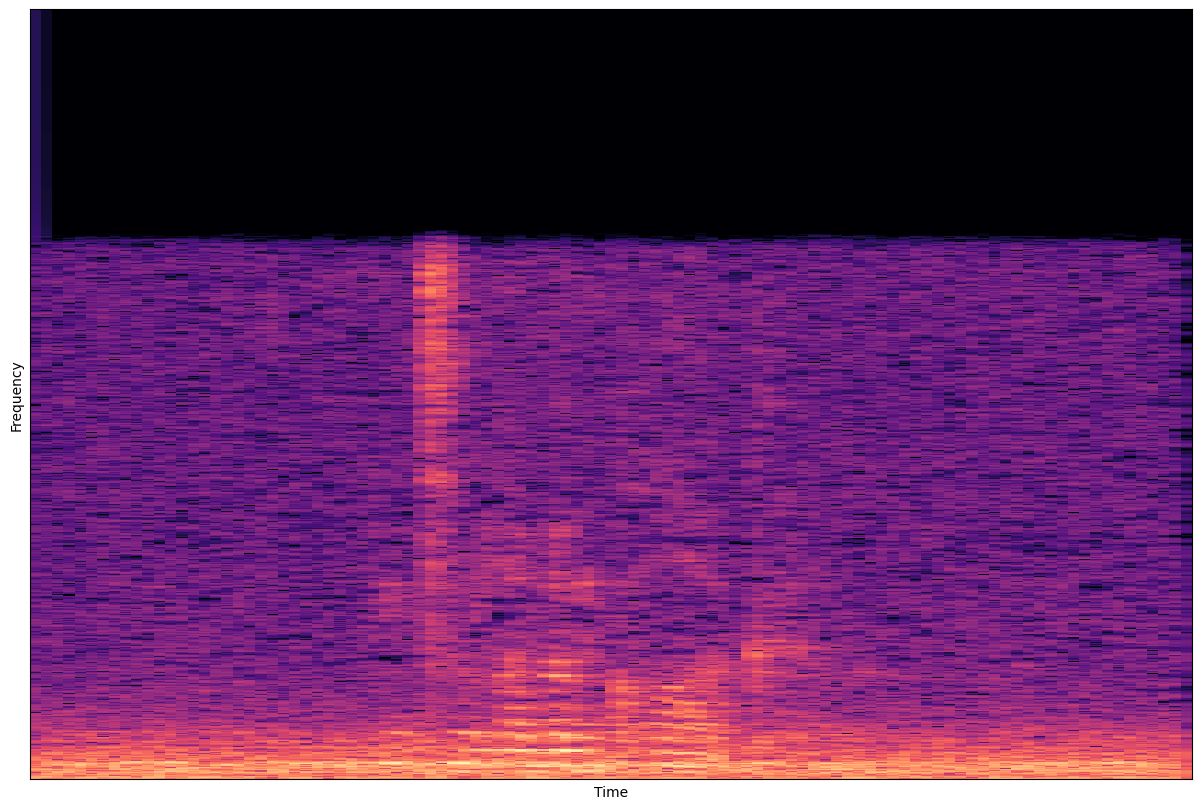

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [63]:
# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

AttributeError: module 'matplotlib' has no attribute 'axes'

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

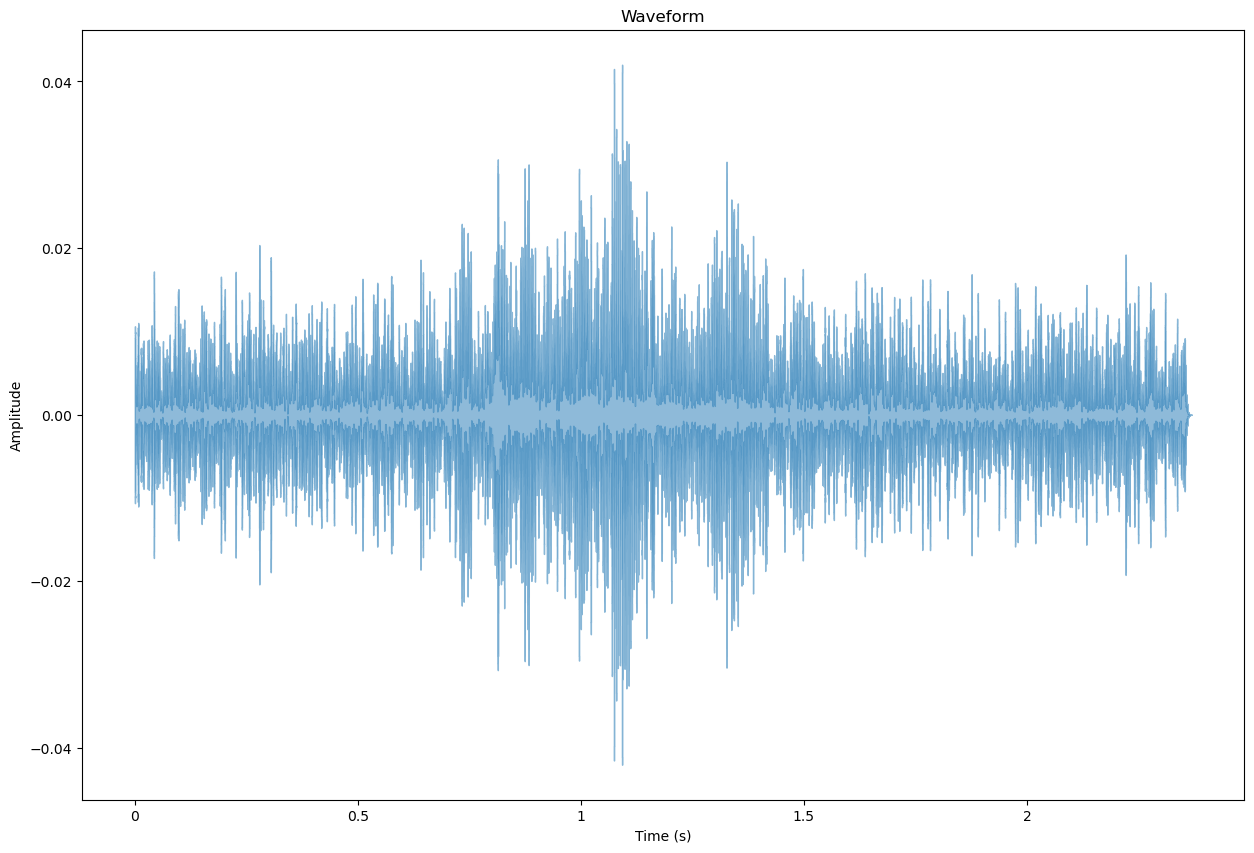

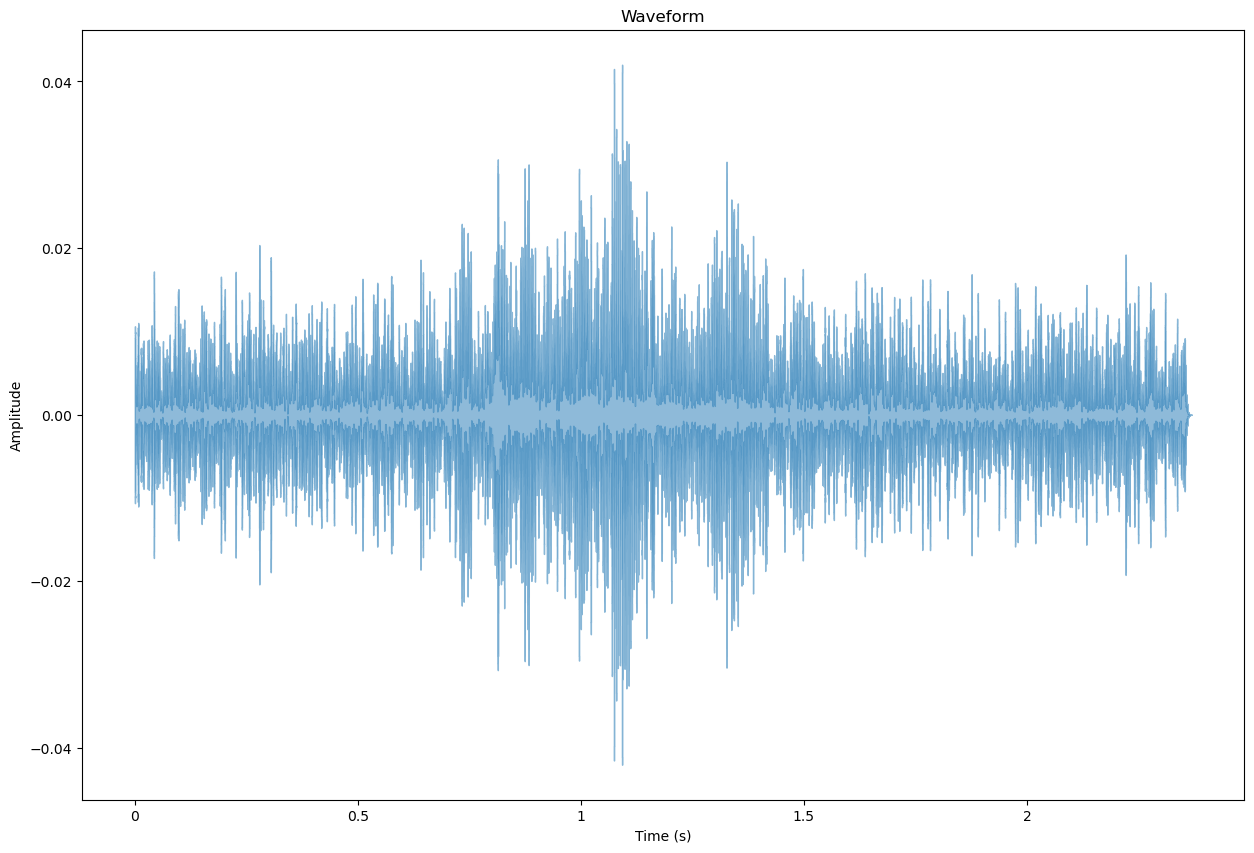

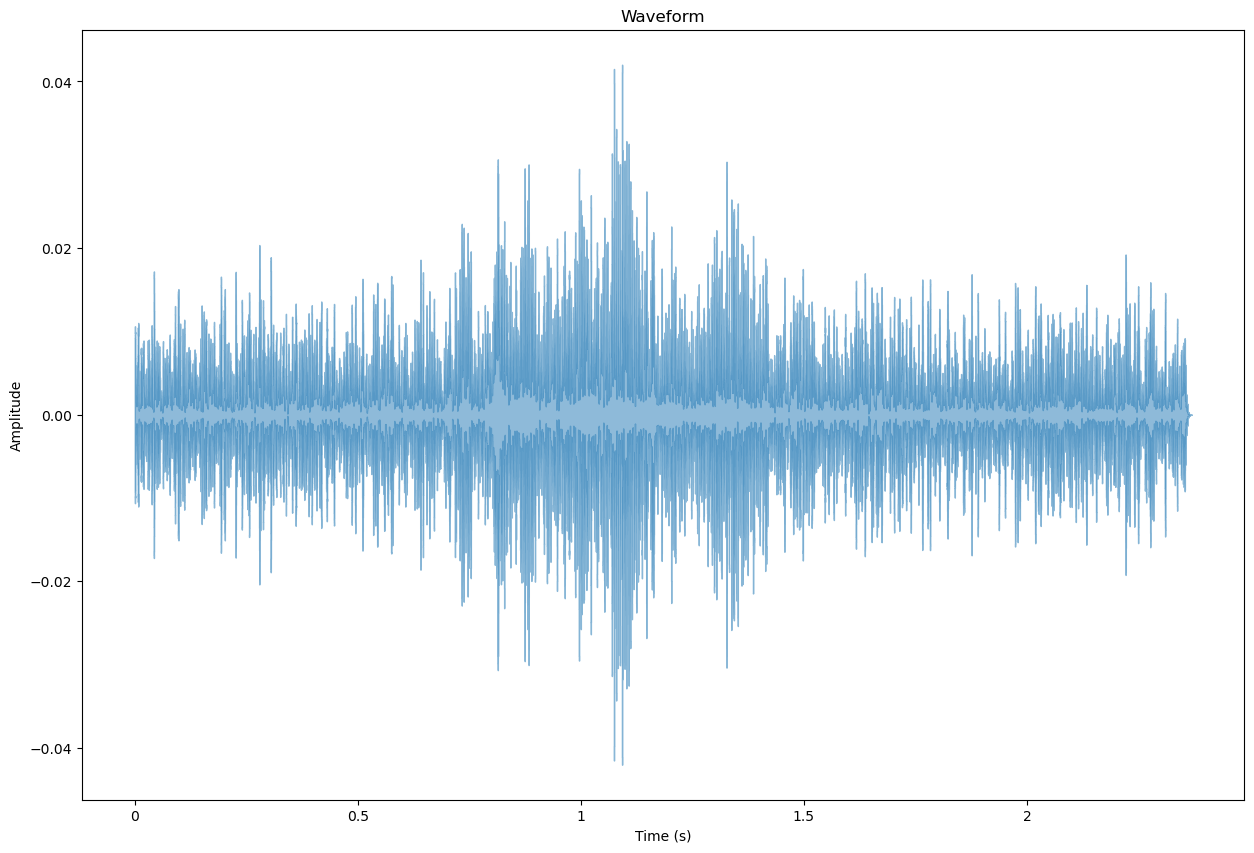

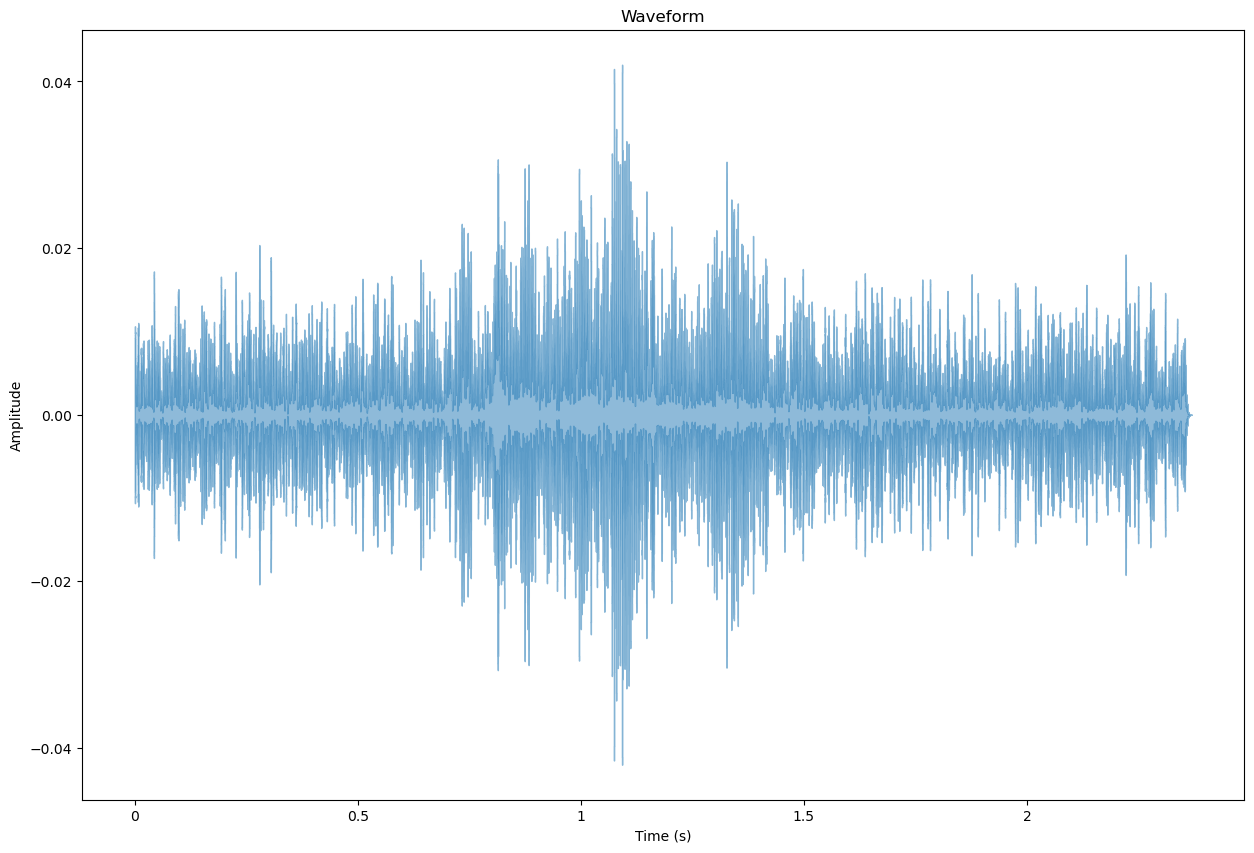

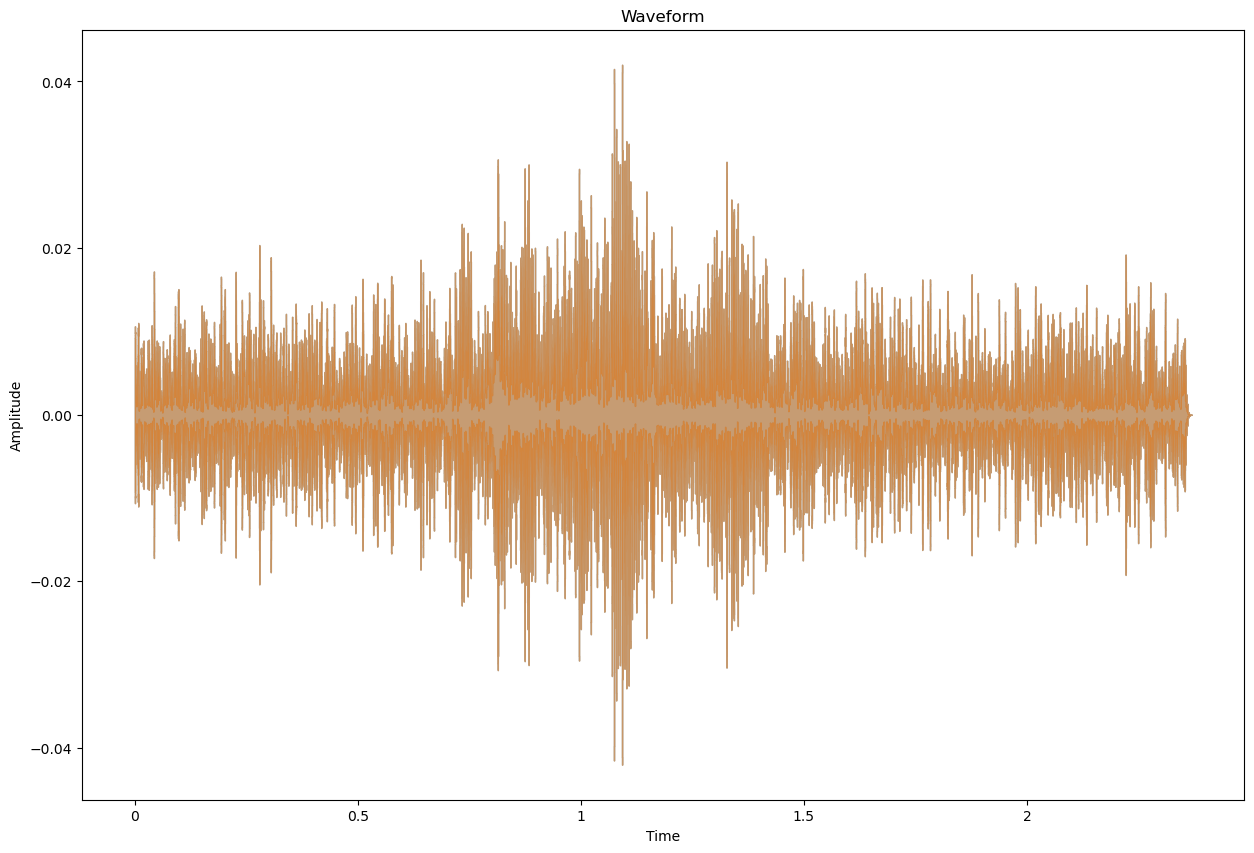

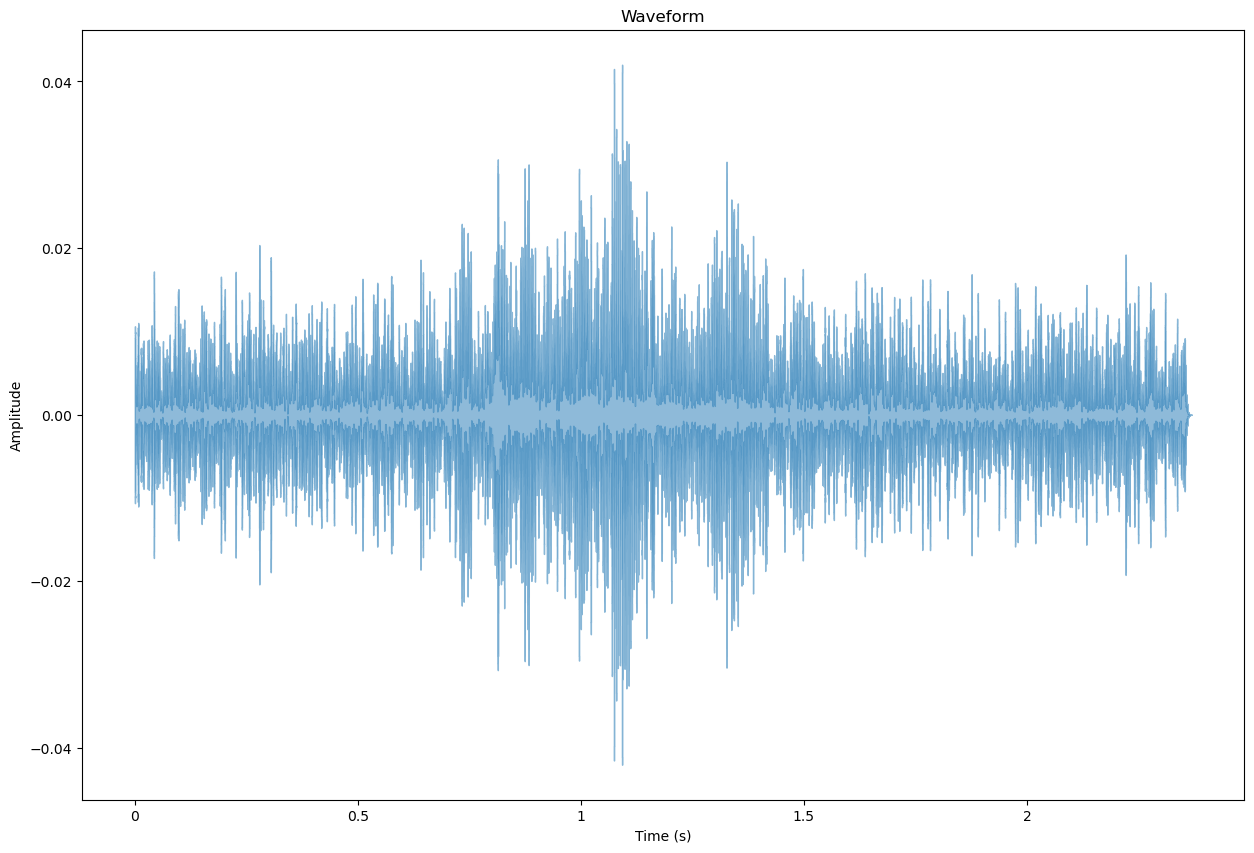

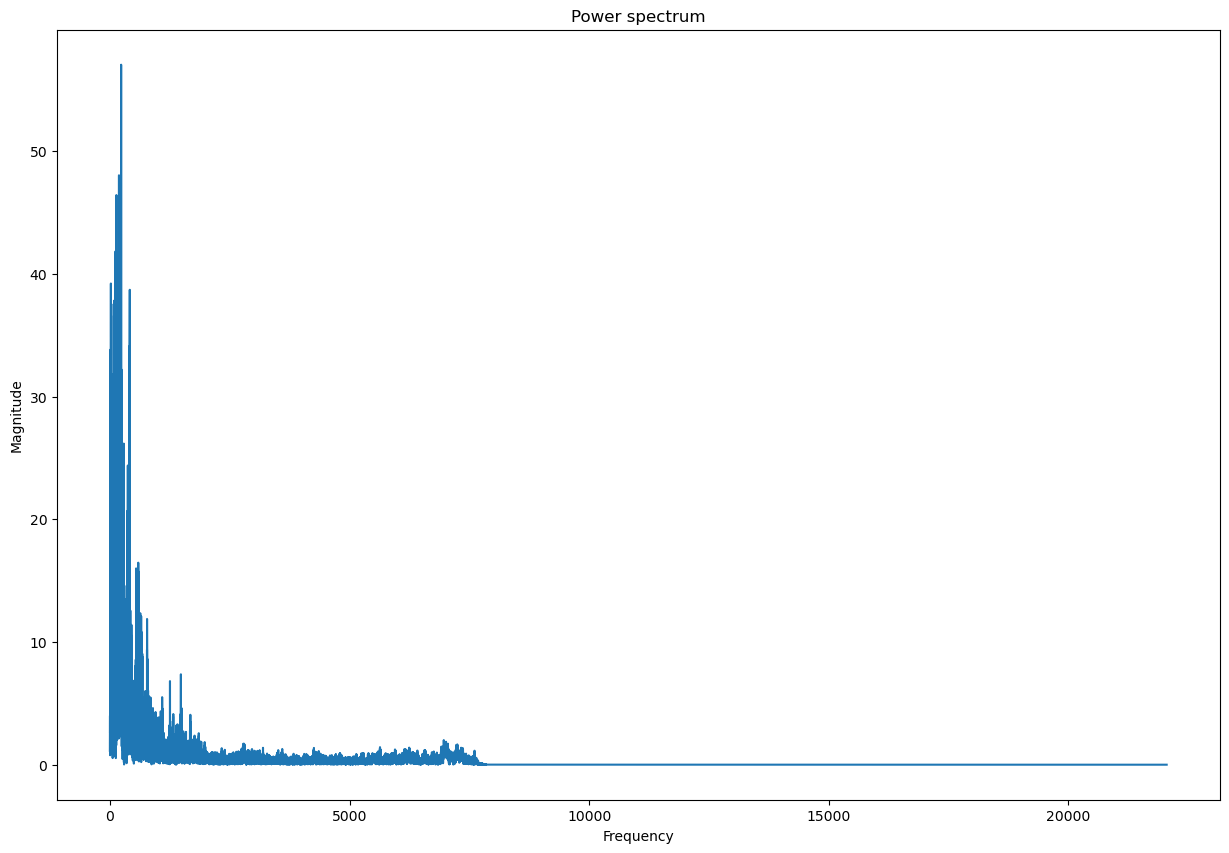

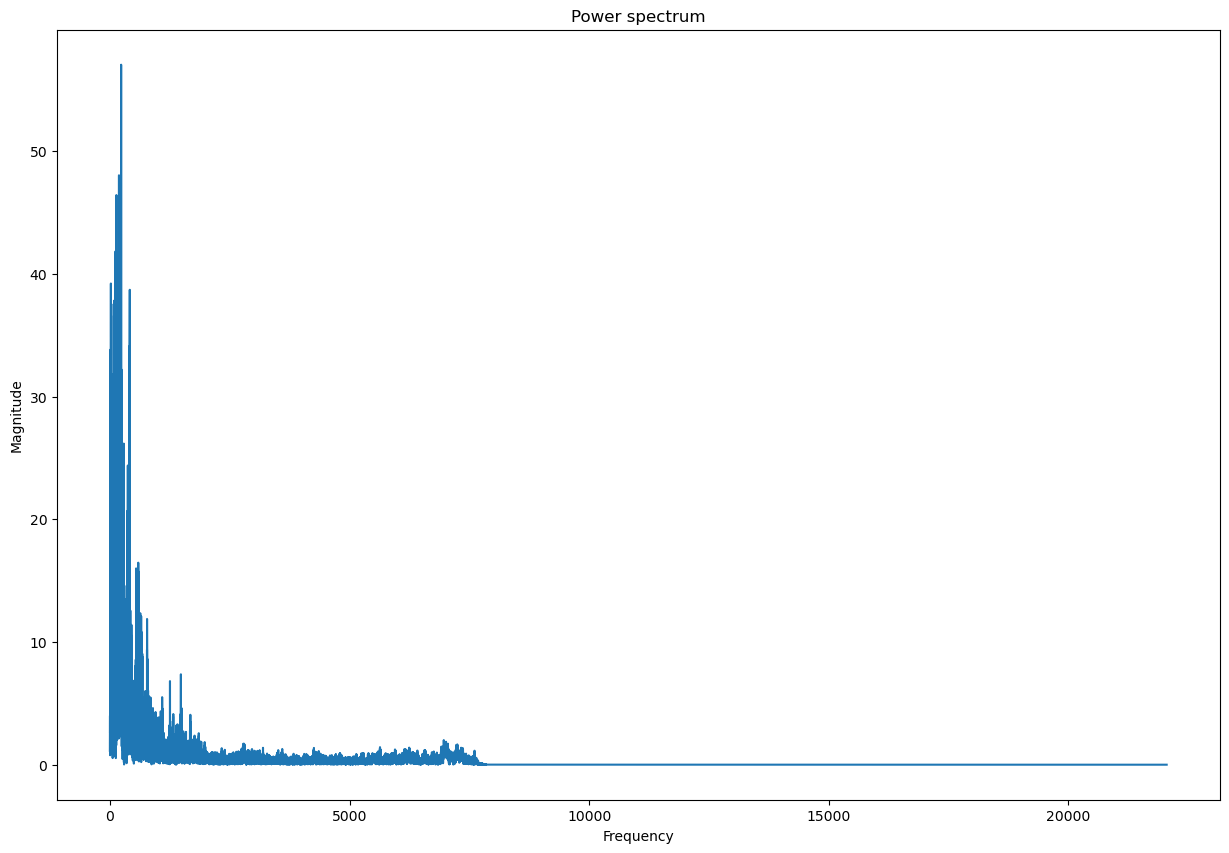

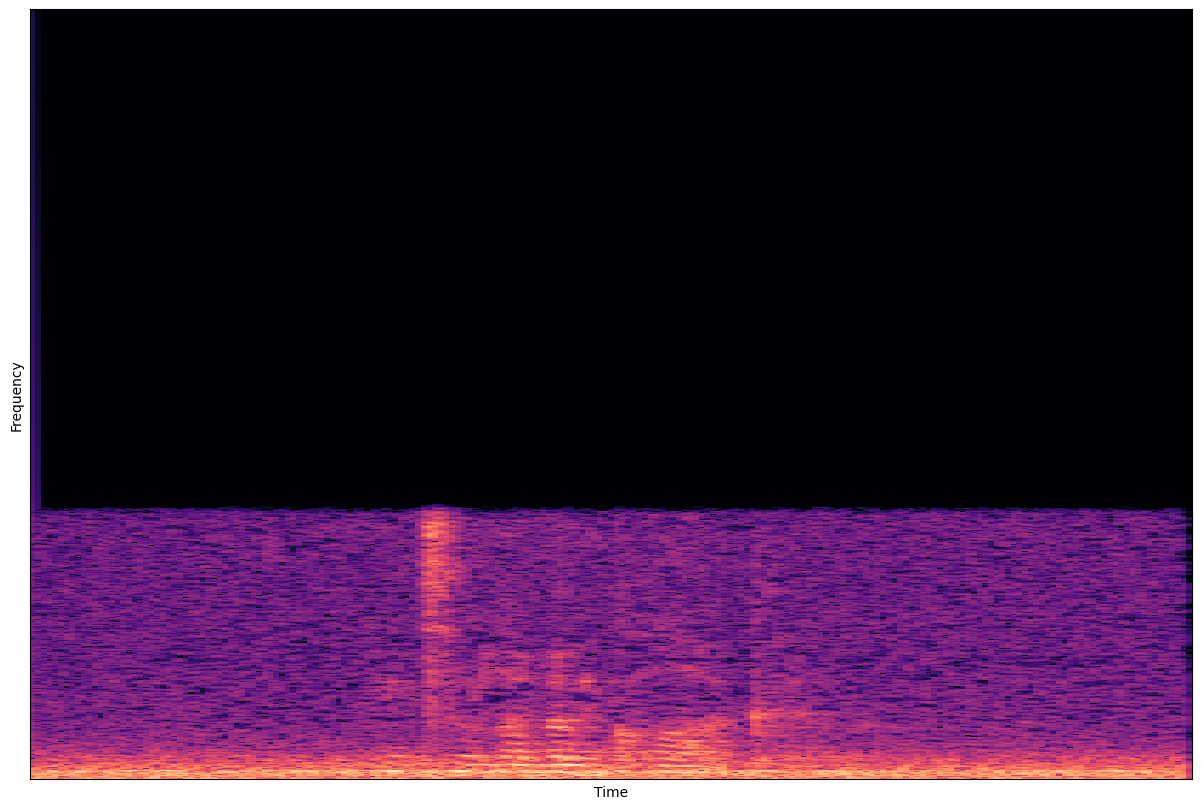

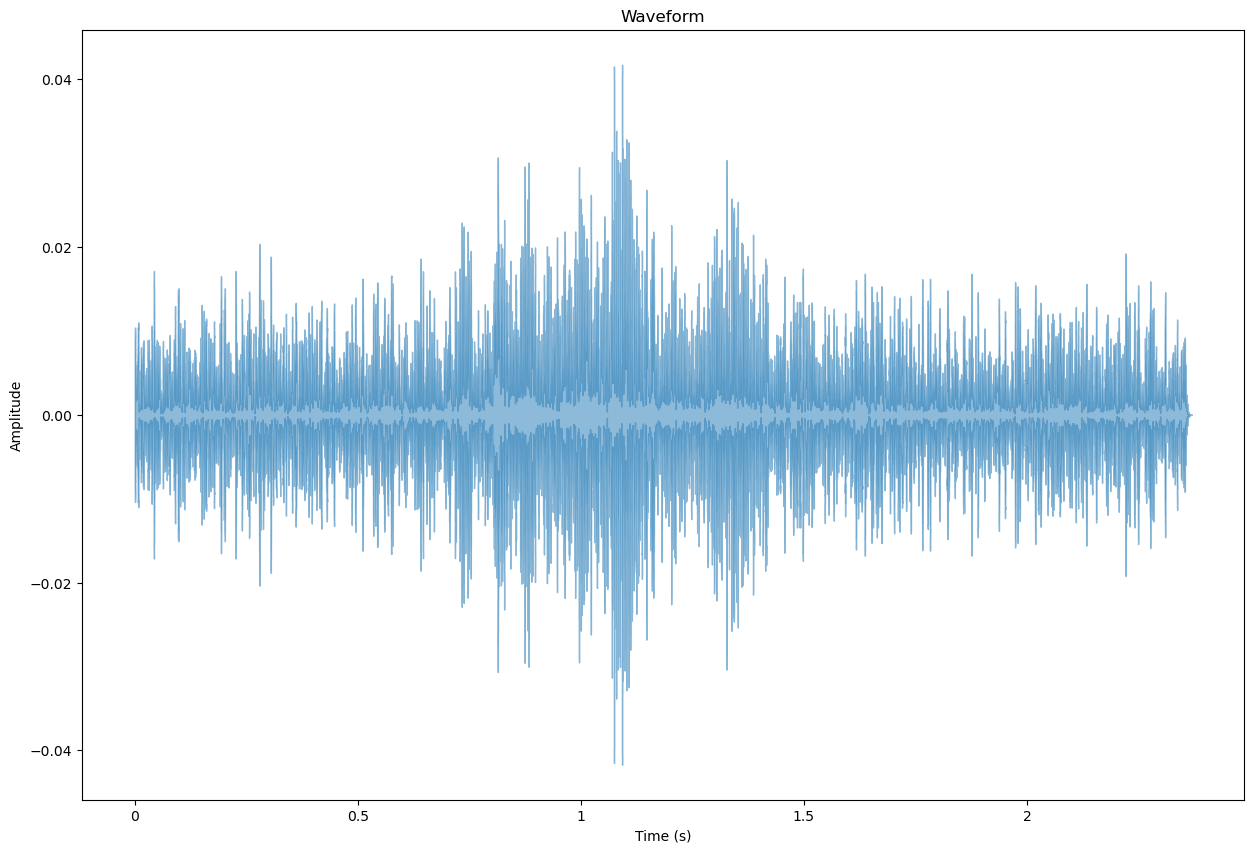

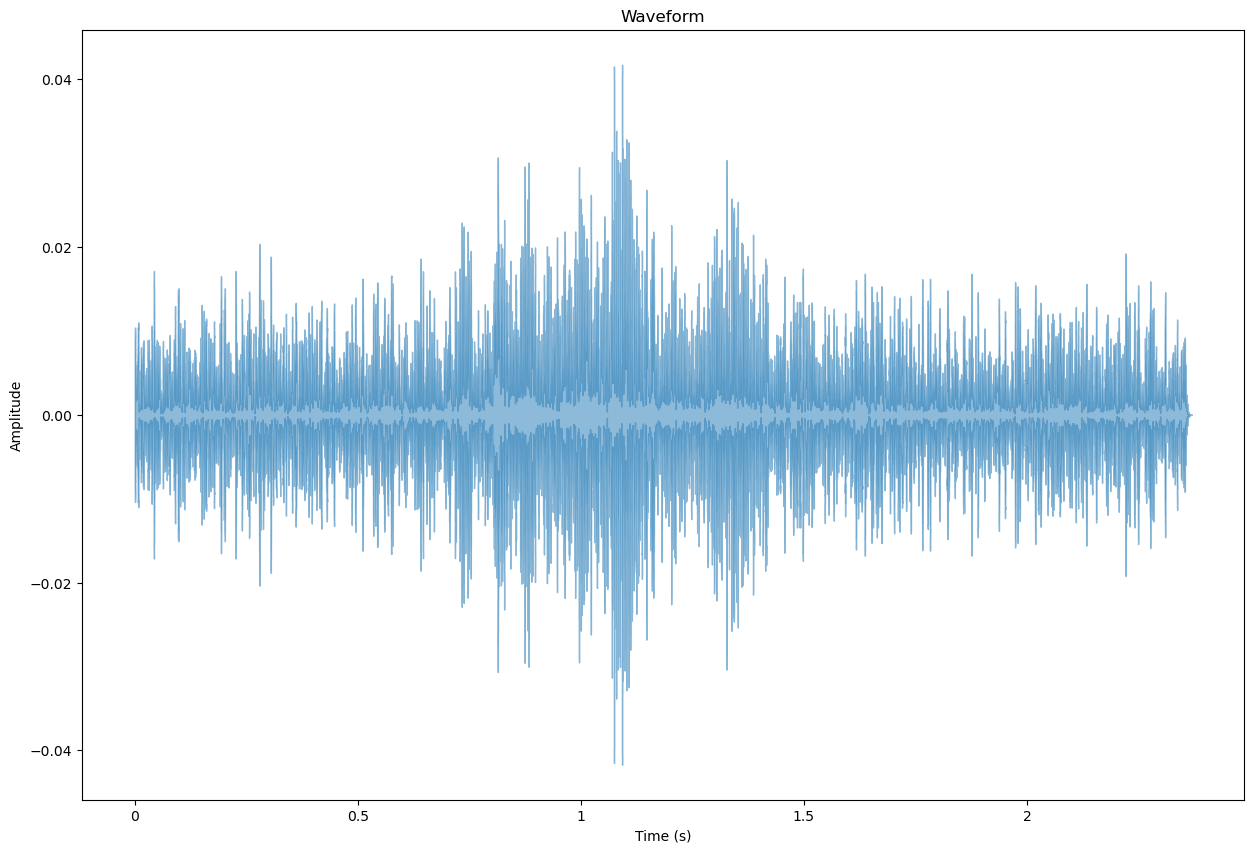

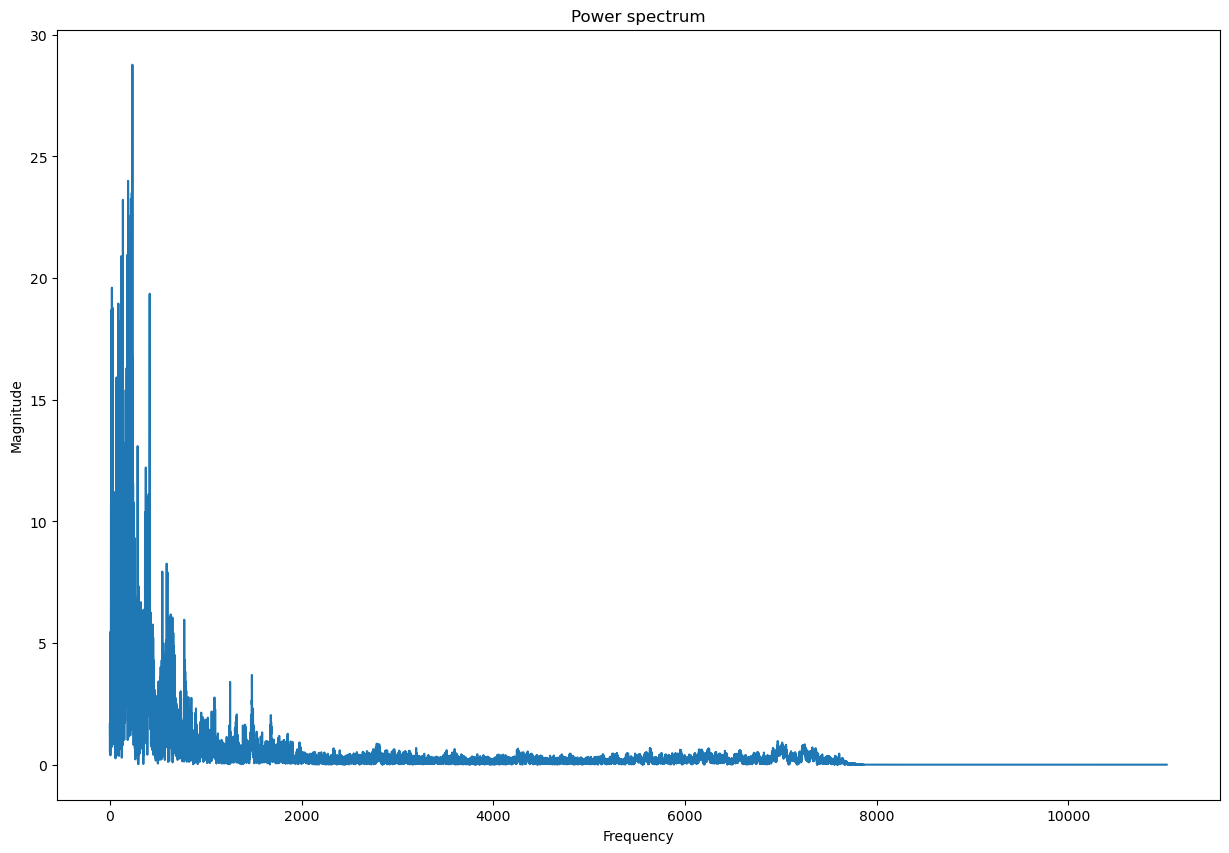

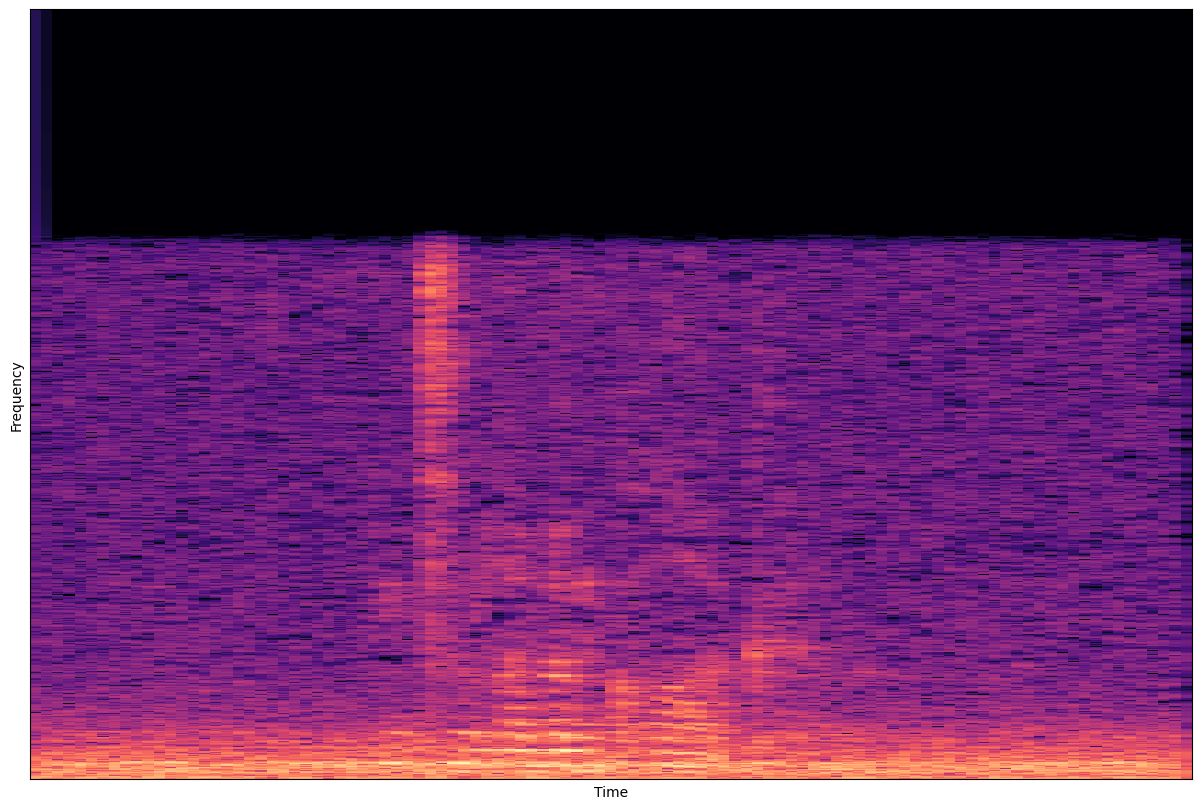

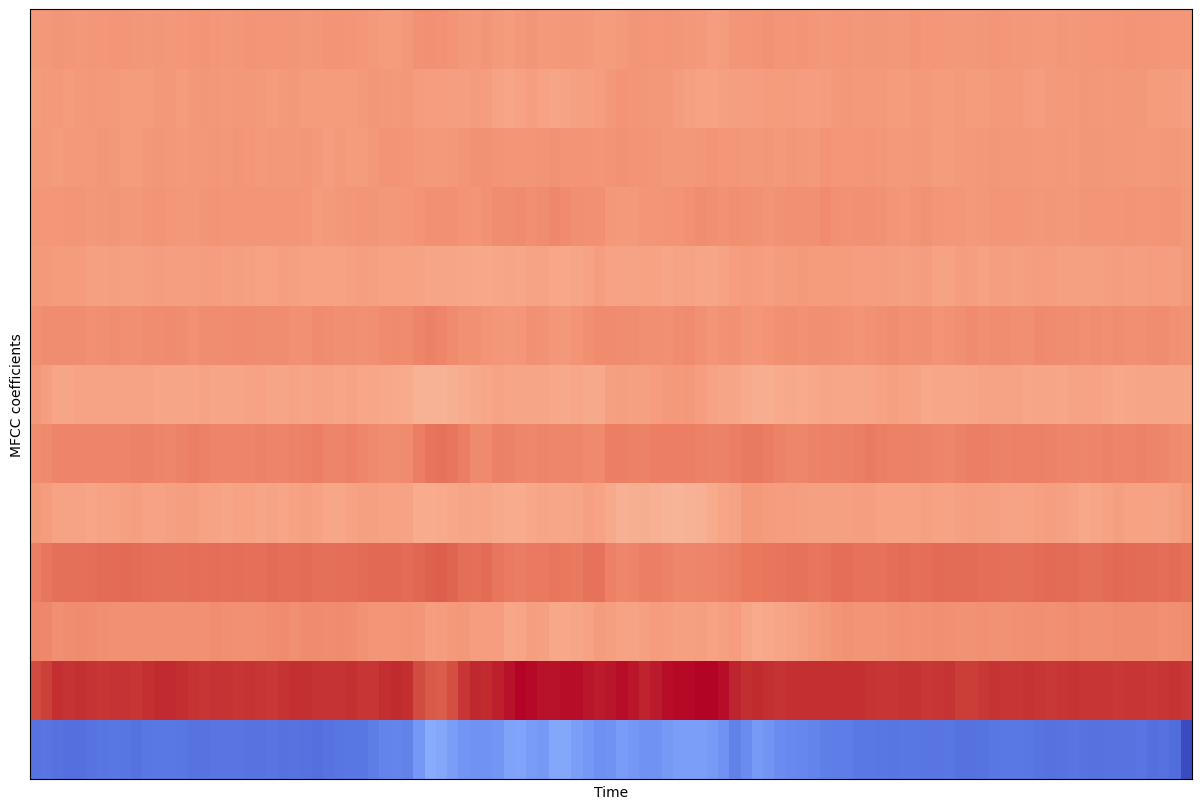

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [65]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(y = sig, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [71]:
MFCCs.shape

(13, 103)

# mfcc2

In [ ]:
# train set MFCC 추출

In [203]:
audio_dir = 'train/'
mfcc_feature = []
for i in tqdm(range(len(train))):
    sig, sr = librosa.load(audio_dir+f'TRAIN_{str(i).zfill(4)}.wav',sr=44100)
    fft = np.fft.fft(sig)
    magnitude = np.abs(fft)
    f = np.linspace(0,sr,len(magnitude))
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]
    hop_length = 512  # 전체 frame 수
    n_fft = 2048
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    MFCCs = librosa.feature.mfcc(y = sig, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    mfcc_feature.append(MFCCs)
               
               
               
    

  0%|          | 0/5001 [00:00<?, ?it/s]

In [209]:
mfcc_feature[3000].shape

(13, 268)

In [222]:
mfcc_feature[1000].shape

(13, 207)

In [207]:
mfcc_feature[3000].T.shape

(268, 13)

In [214]:
mfcc_feature[3000].T[0]

array([-5.51738220e+02,  1.66998184e+02, -4.40777111e+00,  5.30493698e+01,
        2.04001274e+01, -5.10370791e-01,  3.21811066e+01,  2.39957881e+00,
        3.09432793e+00,  5.48839569e+00, -6.69857407e+00,  1.37368555e+01,
       -2.09471893e+00], dtype=float32)

In [223]:
X =np.swapaxes(mfcc_feature, 1, 2)

ValueError: could not broadcast input array from shape (13,205) into shape (13,)

# mfcc2 + 평균을 이용

In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5001 non-null   object
 1   path    5001 non-null   object
 2   label   5001 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


for i in tqdm(range(len(train))):
  y, sr = librosa.load(audio_dir+f'TRAIN_{str(i).zfill(4)}.wav',sr=44100)

In [156]:
mfcc_f = []
for i in tqdm(range(len(train))):
    sig, sr = librosa.load('train/'+f'TRAIN_{str(i).zfill(4)}.wav',sr=44100)
    fft = np.fft.fft(sig)
    magnitude = np.abs(fft)
    f = np.linspace(0,sr,len(magnitude))
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]
    hop_length = 512  # 전체 frame 수
    n_fft = 2048
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    MFCCs = librosa.feature.mfcc(y = sig, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    
    features = []

        # 추출된 MFCC들의 평균을 Feature로 사용
    for e in MFCCs:
        features.append(np.mean(e))
    mfcc_f.append(features)
               
    

  0%|          | 0/5001 [00:00<?, ?it/s]

In [157]:
print(MFCCs.shape)

(13, 271)


In [159]:
mfcc_df = pd.DataFrame(mfcc_f, columns=['mfcc_'+str(x) for x in range(1,14)])

In [160]:
mfcc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mfcc_1   5001 non-null   float32
 1   mfcc_2   5001 non-null   float32
 2   mfcc_3   5001 non-null   float32
 3   mfcc_4   5001 non-null   float32
 4   mfcc_5   5001 non-null   float32
 5   mfcc_6   5001 non-null   float32
 6   mfcc_7   5001 non-null   float32
 7   mfcc_8   5001 non-null   float32
 8   mfcc_9   5001 non-null   float32
 9   mfcc_10  5001 non-null   float32
 10  mfcc_11  5001 non-null   float32
 11  mfcc_12  5001 non-null   float32
 12  mfcc_13  5001 non-null   float32
dtypes: float32(13)
memory usage: 254.1 KB


In [161]:
mfcc_df

mfcc_1      mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0    -531.695190  202.475250 -19.667307  64.620209  18.085896  -8.649203   
1    -521.528809  191.967361 -35.225643  78.740288  23.666927  -5.548991   
2    -436.175720  162.547836  -5.023142  50.701969  16.028397 -11.061485   
3    -450.940369  144.717529  27.860312  36.790833  20.552032  -2.325379   
4    -422.536682  144.337387  24.411663  32.070168  24.831940   4.352208   
...          ...         ...        ...        ...        ...        ...   
4996 -512.441101  172.357849   8.011613  53.928444  19.026634  -0.673343   
4997 -304.451935  114.756706  -8.239097  17.769703  11.349571 -11.342062   
4998 -465.411438  170.944534  -3.704184  52.663429  17.813597  -3.669033   
4999 -513.208801  184.624466 -12.975415  60.732906  18.631102  -7.669458   
5000 -455.376282  161.778580 -18.132360  40.064857  19.658415   2.321941   

         mfcc_7     mfcc_8    mfcc_9    mfcc_10    mfcc_11    mfcc_12  \
0     32.079288 -12.481881  0.996818  11.706519 -14.762737  12.608284   
1     37.559593 -18.268393  3.025454  13.216597 -20.635887  13.331038   
2     16.977106  -8.794944 -2.310059   0.849998 -15.190389   6.265303   
3      3.823058  -2.038857  1.977299  -0.528164  -8.937858   1.057000   
4      4.063816  -7.281356 -4.079869  -3.249997 -12.231174  -0.514222   
...         ...        ...       ...        ...        ...        ...   
4996  26.101152  -5.839896  0.233310   7.311428 -12.002418   2.311909   
4997   4.888551   3.638810 -1.860534  -5.112655  -4.199847   5.878709   
4998  26.401058  -8.727445 -3.462485   5.056214 -14.170521   4.075360   
4999  29.986393 -10.320409 -2.191025  11.569555  -9.797000   9.013594   
5000  20.450882 -16.755974 -4.128624   7.660589 -10.039009   3.200302   

       mfcc_13  
0     3.120098  
1    -0.626985  
2    -1.368743  
3    -3.168101  
4     2.357058  
...        ...  
4996 -4.160218  
4997 -3.454298  
4998 -0.724351  
4999 -0.882420  
5000 -7.027529  

[5001 rows x 13 columns]

In [147]:
y_train = train['label']
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5001 entries, 0 to 5000
Series name: label
Non-Null Count  Dtype
--------------  -----
5001 non-null   int64
dtypes: int64(1)
memory usage: 39.2 KB


In [163]:
from sklearn.svm import SVC

In [164]:
model = SVC()
model.fit(mfcc_df, y_train)

SVC()

In [166]:
mfcc_ft = []
for i in tqdm(range(len(test))):
    sig, sr = librosa.load('test/'+f'TEST_{str(i).zfill(4)}.wav',sr=44100)
    fft = np.fft.fft(sig)
    magnitude = np.abs(fft)
    f = np.linspace(0,sr,len(magnitude))
    left_spectrum = magnitude[:int(len(magnitude)/2)]
    left_f = f[:int(len(magnitude)/2)]
    hop_length = 512  # 전체 frame 수
    n_fft = 2048
    hop_length_duration = float(hop_length)/sr
    n_fft_duration = float(n_fft)/sr
    stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)
    magnitude = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(magnitude)
    MFCCs = librosa.feature.mfcc(y = sig, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    
    features = []

        # 추출된 MFCC들의 평균을 Feature로 사용
    for e in MFCCs:
        features.append(np.mean(e))
    mfcc_ft.append(features)
               
    

  0%|          | 0/1881 [00:00<?, ?it/s]

In [167]:
mfcc_dft = pd.DataFrame(mfcc_ft, columns=['mfcc_'+str(x) for x in range(1,14)])
mfcc_dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mfcc_1   1881 non-null   float32
 1   mfcc_2   1881 non-null   float32
 2   mfcc_3   1881 non-null   float32
 3   mfcc_4   1881 non-null   float32
 4   mfcc_5   1881 non-null   float32
 5   mfcc_6   1881 non-null   float32
 6   mfcc_7   1881 non-null   float32
 7   mfcc_8   1881 non-null   float32
 8   mfcc_9   1881 non-null   float32
 9   mfcc_10  1881 non-null   float32
 10  mfcc_11  1881 non-null   float32
 11  mfcc_12  1881 non-null   float32
 12  mfcc_13  1881 non-null   float32
dtypes: float32(13)
memory usage: 95.6 KB


In [168]:
preds = model.predict(mfcc_dft)

In [169]:
submission = pd.read_csv('./sample_submission.csv')
submission['label'] = preds
submission.to_csv('sub_svm+mean.csv', index=False)

In [170]:
from sklearn.neural_network import MLPClassifier

In [171]:
classifier = MLPClassifier()

In [173]:
classifier.fit(mfcc_df, y_train)

MLPClassifier()

In [175]:
preds = classifier.predict(mfcc_dft)

In [176]:
submission = pd.read_csv('./sample_submission.csv')
submission['label'] = preds
submission.to_csv('sub_MLP+mean.csv', index=False)

In [183]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(mfcc_df, y_train)


y_pred = model.predict(mfcc_dft)

In [185]:
submission = pd.read_csv('./sample_submission.csv')
submission['label'] = y_pred
submission.to_csv('sub_xgb+mean.csv', index=False)

# array 적용